In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric
from sklearn.metrics import confusion_matrix, classification_report, adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", message="'force_all_finite' was renamed")
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# data imports

In [2]:
np.random.seed(42)

In [3]:
energy_complete = pd.read_csv('recs2020.csv')

In [4]:
energy_complete

DOEID    REGIONC            DIVISION  STATE_FIPS state_postal  \
0      100001       WEST      Mountain South          35           NM   
1      100002      SOUTH  West South Central           5           AR   
2      100003       WEST      Mountain South          35           NM   
3      100004      SOUTH      South Atlantic          45           SC   
4      100005  NORTHEAST     Middle Atlantic          34           NJ   
...       ...        ...                 ...         ...          ...   
18491  118492      SOUTH      South Atlantic          24           MD   
18492  118493  NORTHEAST         New England          23           ME   
18493  118494      SOUTH  West South Central          48           TX   
18494  118495      SOUTH      South Atlantic          45           SC   
18495  118496    MIDWEST  West North Central          29           MO   

           state_name   BA_climate IECC_climate_code UATYP10  HDD65  ...  \
0          New Mexico    Mixed-Dry                4B       U   3844  ...   
1            Arkansas  Mixed-Humid                4A       U   3766  ...   
2          New Mexico    Mixed-Dry                4B       U   3819  ...   
3      South Carolina  Mixed-Humid                3A       U   2614  ...   
4          New Jersey  Mixed-Humid                4A       U   4219  ...   
...               ...          ...               ...     ...    ...  ...   
18491        Maryland  Mixed-Humid                4A       U   4572  ...   
18492           Maine    Very-Cold                7A       R   9861  ...   
18493           Texas    Hot-Humid                2A       U    405  ...   
18494  South Carolina    Hot-Humid                3A       U   1245  ...   
18495        Missouri  Mixed-Humid                4A       C   4423  ...   

       EVCHRGHOME  EVCHRGAPT  EVCHRGWKS  EVCHRGBUS  EVCHRGMUNI  EVCHRGDLR  \
0            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
1            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
2            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
3            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
4            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
...           ...        ...        ...        ...         ...        ...   
18491        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18492        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18493        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18494        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18495        -2.0         -2       -2.0       -2.0        -2.0       -2.0   

       EVCHRGHWY  EVCHRGOTH  EVHOMEAMT  EVCHRGTYPE  
0           -2.0       -2.0       -2.0        -2.0  
1           -2.0       -2.0       -2.0        -2.0  
2           -2.0       -2.0       -2.0        -2.0  
3           -2.0       -2.0       -2.0        -2.0  
4           -2.0       -2.0       -2.0        -2.0  
...          ...        ...        ...         ...  
18491       -2.0       -2.0       -2.0        -2.0  
18492       -2.0       -2.0       -2.0        -2.0  
18493       -2.0       -2.0       -2.0        -2.0  
18494       -2.0       -2.0       -2.0        -2.0  
18495       -2.0       -2.0       -2.0        -2.0  

[18496 rows x 799 columns]

In [5]:
energy_complete.columns

Index(['DOEID', 'REGIONC', 'DIVISION', 'STATE_FIPS', 'state_postal',
       'state_name', 'BA_climate', 'IECC_climate_code', 'UATYP10', 'HDD65',
       ...
       'EVCHRGHOME', 'EVCHRGAPT', 'EVCHRGWKS', 'EVCHRGBUS', 'EVCHRGMUNI',
       'EVCHRGDLR', 'EVCHRGHWY', 'EVCHRGOTH', 'EVHOMEAMT', 'EVCHRGTYPE'],
      dtype='object', length=799)

In [6]:
energy_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18496 entries, 0 to 18495
Columns: 799 entries, DOEID to EVCHRGTYPE
dtypes: float64(243), int64(549), object(7)
memory usage: 112.7+ MB


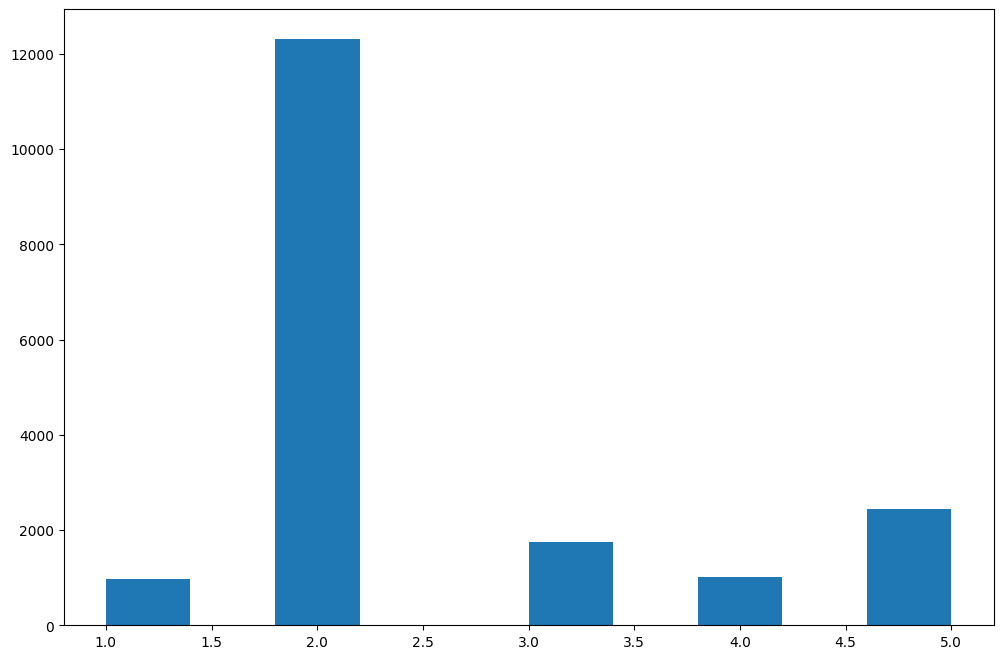

In [7]:
plt.figure(figsize=(12,8))
plt.hist(energy_complete['TYPEHUQ'])
plt.show()

In [8]:
energy_complete = energy_complete[energy_complete['TYPEHUQ'] == 2.0]

In [9]:
energy_complete

DOEID    REGIONC            DIVISION  STATE_FIPS state_postal  \
0      100001       WEST      Mountain South          35           NM   
3      100004      SOUTH      South Atlantic          45           SC   
5      100006      SOUTH  West South Central          48           TX   
6      100007      SOUTH  West South Central          40           OK   
10     100011       WEST             Pacific           6           CA   
...       ...        ...                 ...         ...          ...   
18488  118489      SOUTH      South Atlantic          12           FL   
18489  118490      SOUTH      South Atlantic          51           VA   
18492  118493  NORTHEAST         New England          23           ME   
18494  118495      SOUTH      South Atlantic          45           SC   
18495  118496    MIDWEST  West North Central          29           MO   

           state_name   BA_climate IECC_climate_code UATYP10  HDD65  ...  \
0          New Mexico    Mixed-Dry                4B       U   3844  ...   
3      South Carolina  Mixed-Humid                3A       U   2614  ...   
5               Texas    Hot-Humid                2A       U    901  ...   
6            Oklahoma  Mixed-Humid                3A       U   3148  ...   
10         California      Hot-Dry                3B       U   1467  ...   
...               ...          ...               ...     ...    ...  ...   
18488         Florida    Hot-Humid                2A       R    184  ...   
18489        Virginia  Mixed-Humid                4A       R   4856  ...   
18492           Maine    Very-Cold                7A       R   9861  ...   
18494  South Carolina    Hot-Humid                3A       U   1245  ...   
18495        Missouri  Mixed-Humid                4A       C   4423  ...   

       EVCHRGHOME  EVCHRGAPT  EVCHRGWKS  EVCHRGBUS  EVCHRGMUNI  EVCHRGDLR  \
0            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
3            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
5            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
6            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
10           -2.0         -2       -2.0       -2.0        -2.0       -2.0   
...           ...        ...        ...        ...         ...        ...   
18488        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18489        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18492        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18494        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18495        -2.0         -2       -2.0       -2.0        -2.0       -2.0   

       EVCHRGHWY  EVCHRGOTH  EVHOMEAMT  EVCHRGTYPE  
0           -2.0       -2.0       -2.0        -2.0  
3           -2.0       -2.0       -2.0        -2.0  
5           -2.0       -2.0       -2.0        -2.0  
6           -2.0       -2.0       -2.0        -2.0  
10          -2.0       -2.0       -2.0        -2.0  
...          ...        ...        ...         ...  
18488       -2.0       -2.0       -2.0        -2.0  
18489       -2.0       -2.0       -2.0        -2.0  
18492       -2.0       -2.0       -2.0        -2.0  
18494       -2.0       -2.0       -2.0        -2.0  
18495       -2.0       -2.0       -2.0        -2.0  

[12319 rows x 799 columns]

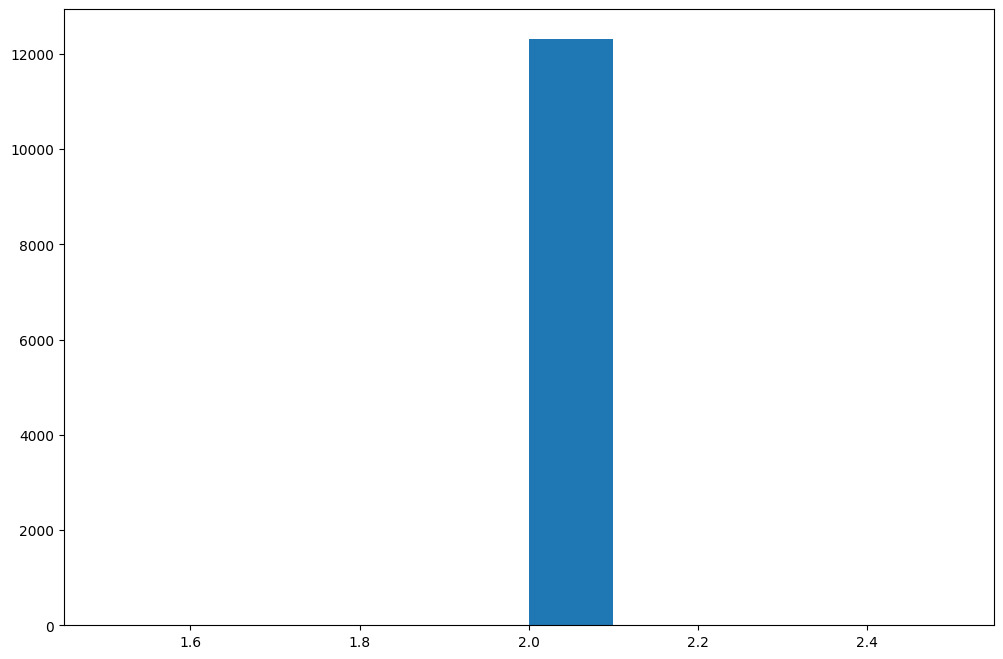

In [10]:
plt.figure(figsize=(12,8))
plt.hist(energy_complete['TYPEHUQ'])
plt.show()

In [11]:
energy_complete

DOEID    REGIONC            DIVISION  STATE_FIPS state_postal  \
0      100001       WEST      Mountain South          35           NM   
3      100004      SOUTH      South Atlantic          45           SC   
5      100006      SOUTH  West South Central          48           TX   
6      100007      SOUTH  West South Central          40           OK   
10     100011       WEST             Pacific           6           CA   
...       ...        ...                 ...         ...          ...   
18488  118489      SOUTH      South Atlantic          12           FL   
18489  118490      SOUTH      South Atlantic          51           VA   
18492  118493  NORTHEAST         New England          23           ME   
18494  118495      SOUTH      South Atlantic          45           SC   
18495  118496    MIDWEST  West North Central          29           MO   

           state_name   BA_climate IECC_climate_code UATYP10  HDD65  ...  \
0          New Mexico    Mixed-Dry                4B       U   3844  ...   
3      South Carolina  Mixed-Humid                3A       U   2614  ...   
5               Texas    Hot-Humid                2A       U    901  ...   
6            Oklahoma  Mixed-Humid                3A       U   3148  ...   
10         California      Hot-Dry                3B       U   1467  ...   
...               ...          ...               ...     ...    ...  ...   
18488         Florida    Hot-Humid                2A       R    184  ...   
18489        Virginia  Mixed-Humid                4A       R   4856  ...   
18492           Maine    Very-Cold                7A       R   9861  ...   
18494  South Carolina    Hot-Humid                3A       U   1245  ...   
18495        Missouri  Mixed-Humid                4A       C   4423  ...   

       EVCHRGHOME  EVCHRGAPT  EVCHRGWKS  EVCHRGBUS  EVCHRGMUNI  EVCHRGDLR  \
0            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
3            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
5            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
6            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
10           -2.0         -2       -2.0       -2.0        -2.0       -2.0   
...           ...        ...        ...        ...         ...        ...   
18488        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18489        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18492        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18494        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18495        -2.0         -2       -2.0       -2.0        -2.0       -2.0   

       EVCHRGHWY  EVCHRGOTH  EVHOMEAMT  EVCHRGTYPE  
0           -2.0       -2.0       -2.0        -2.0  
3           -2.0       -2.0       -2.0        -2.0  
5           -2.0       -2.0       -2.0        -2.0  
6           -2.0       -2.0       -2.0        -2.0  
10          -2.0       -2.0       -2.0        -2.0  
...          ...        ...        ...         ...  
18488       -2.0       -2.0       -2.0        -2.0  
18489       -2.0       -2.0       -2.0        -2.0  
18492       -2.0       -2.0       -2.0        -2.0  
18494       -2.0       -2.0       -2.0        -2.0  
18495       -2.0       -2.0       -2.0        -2.0  

[12319 rows x 799 columns]

* 0 Not imputed
* 1 Imputed amount and cost
* 2 Imputed only amount for SOLAR=1 cases

In [12]:
energy_complete['ZELAMOUNT'].value_counts() # electricty

ZELAMOUNT
0    11054
1      893
2      372
Name: count, dtype: int64

* 0 Not imputed
* 1 Imputed amount and cost
* -2 Not applicable, no natural gas use

In [13]:
energy_complete['ZNGAMOUNT'].value_counts() # gas

ZNGAMOUNT
 0    7012
-2    4565
 1     742
Name: count, dtype: int64

* 0 Not imputed
* 1 Imputed amount and cost
* -2 Not applicable, no propane use

In [14]:
energy_complete['ZLPAMOUNT'].value_counts() # propane

ZLPAMOUNT
-2    10703
 1      843
 0      773
Name: count, dtype: int64

* 0 Not imputed
* 1 Imputed amount and cost
* -2 Not applicable, no fuel oil/kerosene use

In [15]:
energy_complete['ZFOAMOUNT'].value_counts() # oil/kerosene

ZFOAMOUNT
-2    11339
 0      561
 1      419
Name: count, dtype: int64

In [16]:
cols_to_keep = [ 
                # Electricity usage measured in kilowatt-hours
                'KWHSPH', # Calibrated electricity usage for space heating, main and secondary, in kilowatt-hours, 2020
                'KWHCOL', # Calibrated electricity usage for space cooling (central air conditioning, individual units, and evaporative coolers), in kilowatthours, 2020
                'KWHAHUHEAT', # Calibrated electricity usage for distributing space heating via furnace fans and boiler pumps, in kilowatt-hours, 2020
                'KWHAHUCOL', # Calibrated electricity usage for furnace fans used for cooling, in kilowatt-hours, 2020
                'KWHWTH', # Calibrated electricity usage for water heating, main and secondary, in kilowatthours, 2020 
                'KWHRFG', # Calibrated electricity usage for all refrigerators, in kilowatthours, 2020
                'KWHFRZ', # Calibrated electricity usage for freezers, in kilowatt-hours, 2020
                'KWHCOK', # Calibrated electricity usage for cooking (cooktops, ovens, and ranges), in kilowatt-hours, 2020
                'KWHMICRO', # Calibrated electricity usage for microwaves, in kilowatt-hours, 2020
                'KWHCW', # Calibrated electricity usage for clothes washers, in kilowatt-hours, 2020
                'KWHCDR', # Calibrated electricity usage for clothes dryers, in kilowatt-hours, 2020
                'KWHDWH', # Calibrated electricity usage for dishwashers, in kilowatt-hours, 2020
                'KWHTVREL', # Calibrated electricity usage for televisions and related peripherals, in kilowatt-hours, 2020
                
                # Gas usage measured in thousand BTU
                'BTUNGSPH', # Calibrated natural gas usage for space heating, main and secondary, in thousand Btu, 2020
                'BTUNGWTH', # Calibrated natural gas usage for water heating, main and secondary, in thousand Btu, 2020
                'BTUNGCOK', # Calibrated natural gas usage for cooking (cooktops, ovens, and ranges), in thousand Btu, 2020
                'BTUNGCDR', # Calibrated natural gas usage for clothes dryers, in thousand Btu, 2020
                
                # Propane usage measured in thousand BTU
                'BTULPSPH', # Calibrated propane usage for space heating, main and secondary, in thousand Btu, 2020
                'BTULPWTH', # Calibrated propane usage for water heating, main and secondary, in thousand Btu, 2020
                'BTULPCOK', # Calibrated propane usage for cooking (cooktops, ovens, and ranges), in thousand Btu, 2020
                'BTULPCDR', # Calibrated propane usage for clothes dryers, in thousand Btu, 2020
                
                # Oil/kerosene usage measured in thousand BTU
                'BTUFOSPH', # Calibrated fuel oil/kerosene usage for space heating, main and secondary,  in thousand Btu, 2020
                'BTUFOWTH', # Calibrated fuel oil/kerosene usage for water heating, main and secondary, in thousand Btu, 2020
                

                'TOTSQFT_EN' # Total energy-consuming area (square footage) of the housing unit. Includes all main living areas; all basements; heated, cooled, or finished attics; and heating or cooled garages
]

In [17]:
energy = energy_complete[cols_to_keep].copy()

In [18]:
btu_cols = [col for col in cols_to_keep if 'btu' in col.lower()]

for col in btu_cols:
    energy[col] = energy[col] * 0.29307107

In [19]:
energy['Tot_heating'] = energy['KWHSPH'] + energy['KWHAHUHEAT'] + energy['BTUNGSPH'] + energy['BTULPSPH'] + energy['BTUFOSPH']

In [20]:
energy['Tot_cooling'] = energy['KWHCOL'] + energy['KWHAHUCOL']

In [21]:
energy['Tot_waterheat'] = energy['KWHWTH'] + energy['BTUNGWTH'] + energy['BTULPWTH'] + energy['BTUFOWTH']

In [22]:
energy['Tot_refrigeretor'] = energy['KWHRFG'] + energy['KWHFRZ']

In [23]:
energy['Tot_cooking'] = energy['KWHCOK'] + energy['KWHMICRO'] + energy['BTUNGCOK'] + energy['BTULPCOK']

In [24]:
energy['Tot_appliances'] = energy['KWHCW'] + energy['KWHCDR'] + energy['KWHDWH'] + energy['KWHTVREL'] + energy['BTUNGCDR'] + energy['BTULPCDR']

In [25]:
energy.drop([
                # Electricity usage measured in kilowatt-hours
                'KWHSPH', # Calibrated electricity usage for space heating, main and secondary, in kilowatt-hours, 2020
                'KWHCOL', # Calibrated electricity usage for space cooling (central air conditioning, individual units, and evaporative coolers), in kilowatthours, 2020
                'KWHAHUHEAT', # Calibrated electricity usage for distributing space heating via furnace fans and boiler pumps, in kilowatt-hours, 2020
                'KWHAHUCOL', # Calibrated electricity usage for furnace fans used for cooling, in kilowatt-hours, 2020
                'KWHWTH', # Calibrated electricity usage for water heating, main and secondary, in kilowatthours, 2020 
                'KWHRFG', # Calibrated electricity usage for all refrigerators, in kilowatthours, 2020
                'KWHFRZ', # Calibrated electricity usage for freezers, in kilowatt-hours, 2020
                'KWHCOK', # Calibrated electricity usage for cooking (cooktops, ovens, and ranges), in kilowatt-hours, 2020
                'KWHMICRO', # Calibrated electricity usage for microwaves, in kilowatt-hours, 2020
                'KWHCW', # Calibrated electricity usage for clothes washers, in kilowatt-hours, 2020
                'KWHCDR', # Calibrated electricity usage for clothes dryers, in kilowatt-hours, 2020
                'KWHDWH', # Calibrated electricity usage for dishwashers, in kilowatt-hours, 2020
                'KWHTVREL', # Calibrated electricity usage for televisions and related peripherals, in kilowatt-hours, 2020
                
                # Gas usage measured in thousand BTU
                'BTUNGSPH', # Calibrated natural gas usage for space heating, main and secondary, in thousand Btu, 2020
                'BTUNGWTH', # Calibrated natural gas usage for water heating, main and secondary, in thousand Btu, 2020
                'BTUNGCOK', # Calibrated natural gas usage for cooking (cooktops, ovens, and ranges), in thousand Btu, 2020
                'BTUNGCDR', # Calibrated natural gas usage for clothes dryers, in thousand Btu, 2020
                
                # Propane usage measured in thousand BTU
                'BTULPSPH', # Calibrated propane usage for space heating, main and secondary, in thousand Btu, 2020
                'BTULPWTH', # Calibrated propane usage for water heating, main and secondary, in thousand Btu, 2020
                'BTULPCOK', # Calibrated propane usage for cooking (cooktops, ovens, and ranges), in thousand Btu, 2020
                'BTULPCDR', # Calibrated propane usage for clothes dryers, in thousand Btu, 2020
                
                # Oil/kerosene usage measured in thousand BTU
                'BTUFOSPH', # Calibrated fuel oil/kerosene usage for space heating, main and secondary,  in thousand Btu, 2020
                'BTUFOWTH', # Calibrated fuel oil/kerosene usage for water heating, main and secondary, in thousand Btu, 2020
],axis=1,inplace=True)

In [26]:
energy

TOTSQFT_EN   Tot_heating  Tot_cooling  Tot_waterheat  Tot_refrigeretor  \
0            2100  21979.373811      3920.66    6225.222242           1767.81   
3            2100  12861.522716      1760.83    6172.431350            965.40   
5            4520   4357.082148      8272.06    5717.294909           1374.54   
6            2100  23856.324175      5675.82    4064.154271            707.12   
10           1630   6673.112837      2767.98    2997.809321           1310.01   
...           ...           ...          ...            ...               ...   
18488        2490      0.000000      4602.96    1761.980000           1887.11   
18489        1850   1674.509611       121.95     261.840000            120.09   
18492        3070  57593.351047       938.13    4566.023825            610.62   
18494        3000   1492.590433      6742.96    1603.470000           2140.54   
18495        2000  10382.860000      3826.94    1711.360000           1123.52   

       Tot_cooking  Tot_appliances  
0      2349.699845     3847.640000  
3       902.154736     1718.970000  
5      1315.510000     1324.907275  
6       540.040000     1902.810000  
10      129.820000      641.970000  
...            ...             ...  
18488   449.720000     1643.960000  
18489    72.500000      228.000000  
18492   254.210000      527.510000  
18494   196.550000      511.590000  
18495   429.520000     1214.790000  

[12319 rows x 7 columns]

<Axes: >

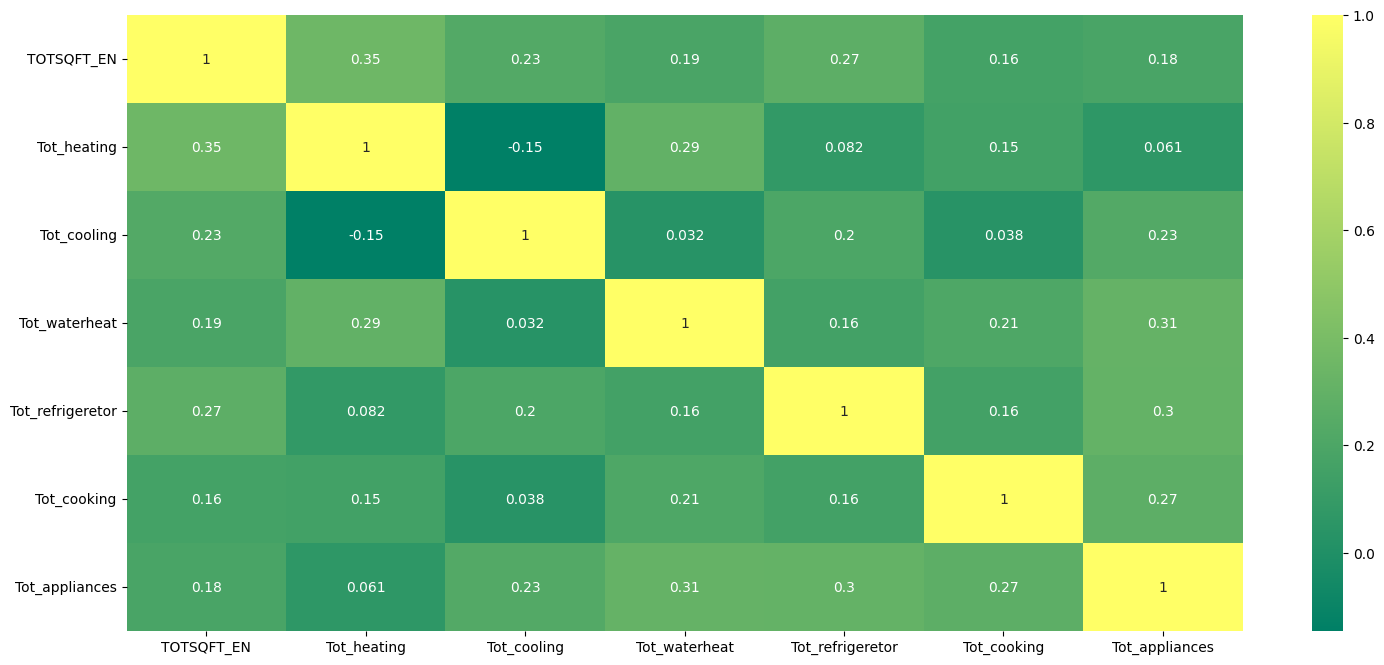

In [27]:
plt.figure(figsize=(18,8))
sns.heatmap(energy.corr(),cmap='summer',annot=True)

In [28]:
for col in energy.columns:
    if col != 'TOTSQFT_EN':
        energy[col + '_EUI'] = energy[col] / energy['TOTSQFT_EN']

In [29]:
energy.drop('TOTSQFT_EN',axis=1,inplace=True)

In [30]:
for col in energy.columns:
    if 'EUI' not in col:
        energy.drop(col,axis=1,inplace=True)

In [31]:
energy

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0            10.466368         1.866981           2.964392   
3             6.124535         0.838490           2.939253   
5             0.963956         1.830102           1.264888   
6            11.360154         2.702771           1.935312   
10            4.093934         1.698147           1.839147   
...                ...              ...                ...   
18488         0.000000         1.848578           0.707622   
18489         0.905140         0.065919           0.141535   
18492        18.760049         0.305580           1.487304   
18494         0.497530         2.247653           0.534490   
18495         5.191430         1.913470           0.855680   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  
0                  0.841814         1.118905            1.832210  
3                  0.459714         0.429597            0.818557  
5                  0.304102         0.291042            0.293121  
6                  0.336724         0.257162            0.906100  
10                 0.803687         0.079644            0.393847  
...                     ...              ...                 ...  
18488              0.757876         0.180610            0.660225  
18489              0.064914         0.039189            0.123243  
18492              0.198899         0.082805            0.171827  
18494              0.713513         0.065517            0.170530  
18495              0.561760         0.214760            0.607395  

[12319 rows x 6 columns]

<Axes: >

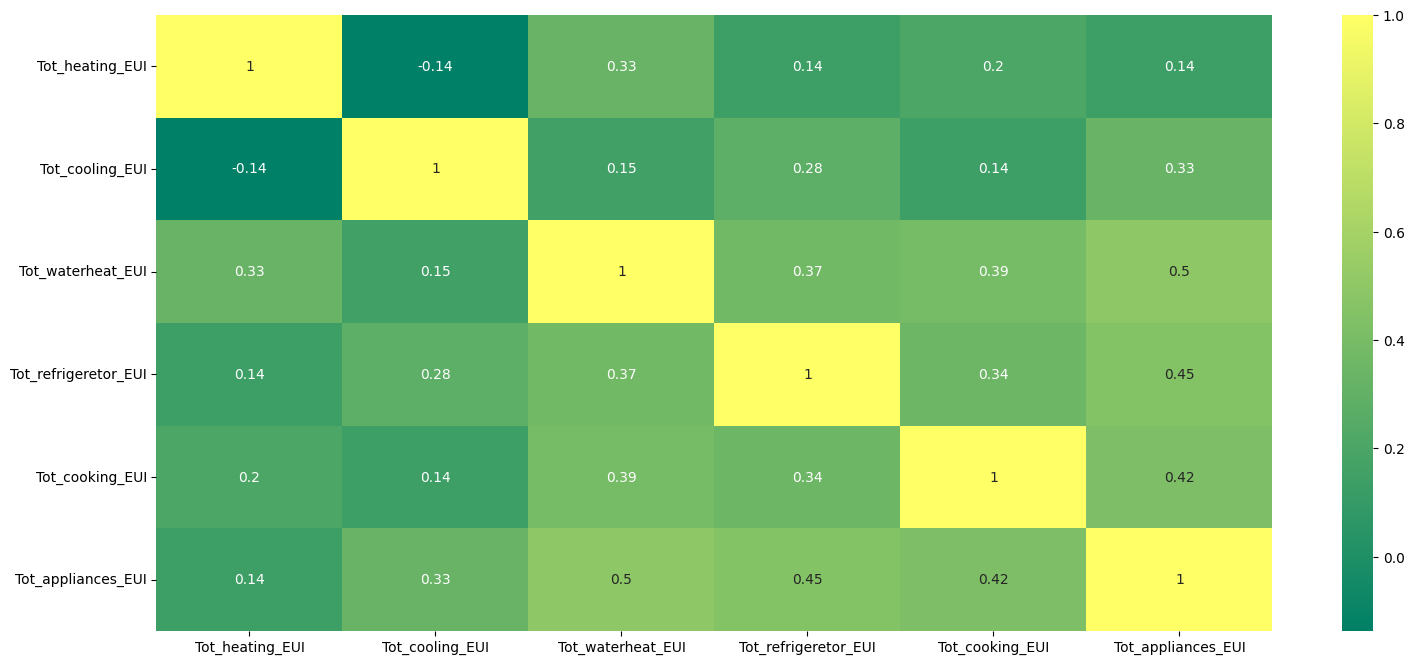

In [32]:
plt.figure(figsize=(18,8))
sns.heatmap(energy.corr(),cmap='summer',annot=True)

# data standardization

In [33]:
energy

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0            10.466368         1.866981           2.964392   
3             6.124535         0.838490           2.939253   
5             0.963956         1.830102           1.264888   
6            11.360154         2.702771           1.935312   
10            4.093934         1.698147           1.839147   
...                ...              ...                ...   
18488         0.000000         1.848578           0.707622   
18489         0.905140         0.065919           0.141535   
18492        18.760049         0.305580           1.487304   
18494         0.497530         2.247653           0.534490   
18495         5.191430         1.913470           0.855680   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  
0                  0.841814         1.118905            1.832210  
3                  0.459714         0.429597            0.818557  
5                  0.304102         0.291042            0.293121  
6                  0.336724         0.257162            0.906100  
10                 0.803687         0.079644            0.393847  
...                     ...              ...                 ...  
18488              0.757876         0.180610            0.660225  
18489              0.064914         0.039189            0.123243  
18492              0.198899         0.082805            0.171827  
18494              0.713513         0.065517            0.170530  
18495              0.561760         0.214760            0.607395  

[12319 rows x 6 columns]

In [34]:
scaler = StandardScaler()

In [35]:
energy_scaled = scaler.fit_transform(energy)

In [36]:
np.mean(energy_scaled),np.std(energy_scaled)

(-3.362182020078673e-17, 1.0)

In [37]:
energy_scaled = pd.DataFrame(energy_scaled,columns=energy.columns)

In [38]:
energy_scaled

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0             0.701582         0.390188           0.282245   
1            -0.065298        -0.329103           0.269734   
2            -0.976789         0.364396          -0.563570   
3             0.859447         0.974712          -0.229911   
4            -0.423954         0.272112          -0.277771   
...                ...              ...                ...   
12314        -1.147049         0.377318          -0.840912   
12315        -0.987178        -0.869413          -1.122644   
12316         2.166460        -0.701802          -0.452877   
12317        -1.059172         0.656418          -0.927077   
12318        -0.230108         0.422701          -0.767226   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  
0                  0.501495         2.777355            1.576855  
1                 -0.372616         0.418060            0.047695  
2                 -0.728603        -0.056174           -0.744960  
3                 -0.653975        -0.172136            0.179759  
4                  0.414273        -0.779727           -0.593009  
...                     ...              ...                 ...  
12314              0.309472        -0.434149           -0.191160  
12315             -1.275782        -0.918192           -1.001231  
12316             -0.969270        -0.768910           -0.927939  
12317              0.207987        -0.828081           -0.929896  
12318             -0.139171        -0.317265           -0.270857  

[12319 rows x 6 columns]

# dimensionality reduction algorithms

## pca 

In [39]:
pca_general = PCA()

In [40]:
pca_general.fit(energy_scaled)

PCA()

In [41]:
explained_variance = pca_general.explained_variance_ratio_

In [42]:
explained_variance

array([0.41150567, 0.20080883, 0.11454109, 0.10252893, 0.0959756 ,
       0.07463988])

In [43]:
eigenvalues = pca_general.explained_variance_

In [44]:
eigenvalues

array([2.46923449, 1.20495076, 0.68730232, 0.61522351, 0.57590036,
       0.44787564])

In [45]:
selected_components = []

for i in eigenvalues:
    if i > 1:
        selected_components.append(i)
    
print(selected_components)

[2.4692344897695375, 1.2049507631740508]


In [46]:
N_COMPONENTS = len(selected_components)

In [47]:
eigenvectors = pca_general.components_

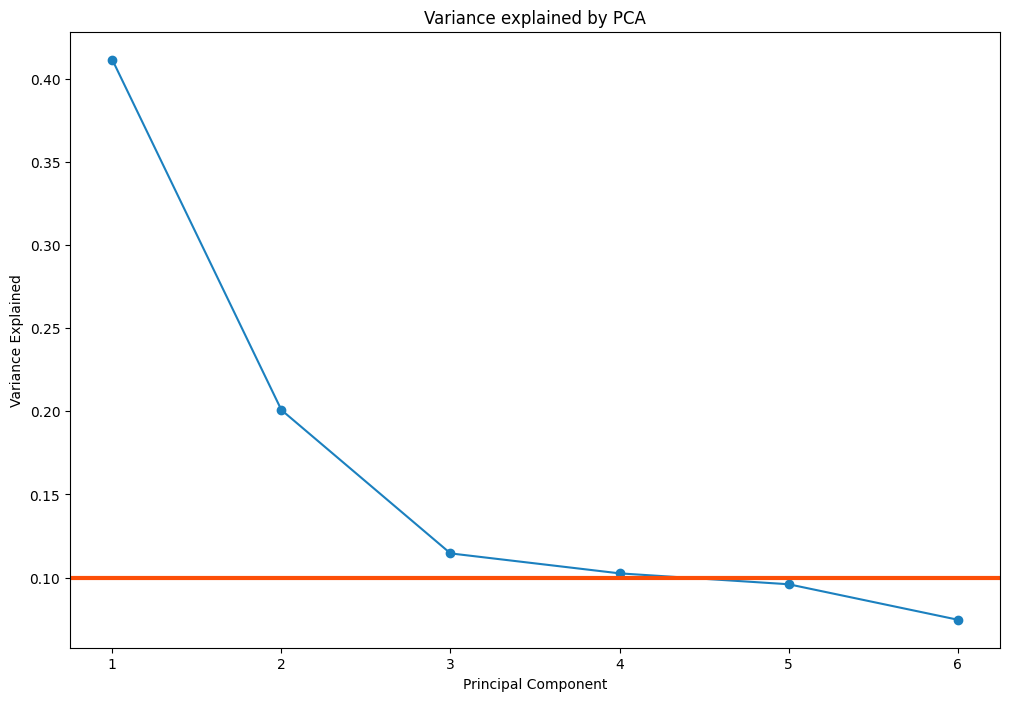

In [48]:
plt.figure(figsize=(12,8))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [49]:
pca = PCA(n_components=N_COMPONENTS)

In [50]:
X_pca = pca.fit_transform(energy_scaled)

In [51]:
pca_columns = [f'dim_{i+1}' for i in range(N_COMPONENTS)]

In [52]:
X_pca = pd.DataFrame(X_pca, columns=pca_columns)

In [53]:
X_pca

dim_1     dim_2
0      2.630159  0.307263
1      0.064649  0.323469
2     -1.128947 -0.823156
3      0.072229 -0.037555
4     -0.611680 -0.596377
...         ...       ...
12314 -0.716145 -1.284180
12315 -2.476678 -0.123885
12316 -1.135930  2.043422
12317 -1.252543 -1.349996
12318 -0.645798 -0.574090

[12319 rows x 2 columns]

## t-SNE

In [54]:
tsne = TSNE(n_components=3,random_state=42)

In [55]:
X_tsne = tsne.fit_transform(energy_scaled)

In [56]:
tsne_columns = [f'dim_{i+1}' for i in range(3)]

In [57]:
X_tsne = pd.DataFrame(X_tsne, columns=tsne_columns)

In [58]:
X_tsne

dim_1      dim_2      dim_3
0      16.471027  -3.255639  -9.144908
1       3.684983  -1.728449  -9.755862
2      -7.056945 -13.807268  -4.200315
3       6.955934 -14.182833 -12.334900
4      -1.585794 -13.530127  11.199203
...          ...        ...        ...
12314  -4.069278 -12.434826   4.890965
12315 -25.330040  -4.816236   1.948805
12316   1.747321  24.677883   1.856256
12317  -5.042918 -19.277292   3.113922
12318  -5.161038 -14.690971  10.663859

[12319 rows x 3 columns]

## umap

In [59]:
umap = umap.UMAP(n_components=3,random_state=42)

In [60]:
X_umap = umap.fit_transform(energy_scaled)

In [61]:
umap_columns = [f'dim_{i+1}' for i in range(3)]

In [62]:
X_umap = pd.DataFrame(X_umap, columns=umap_columns)

# clustering algorithms

## k-means 

In [63]:
N_CLUSTER = 3

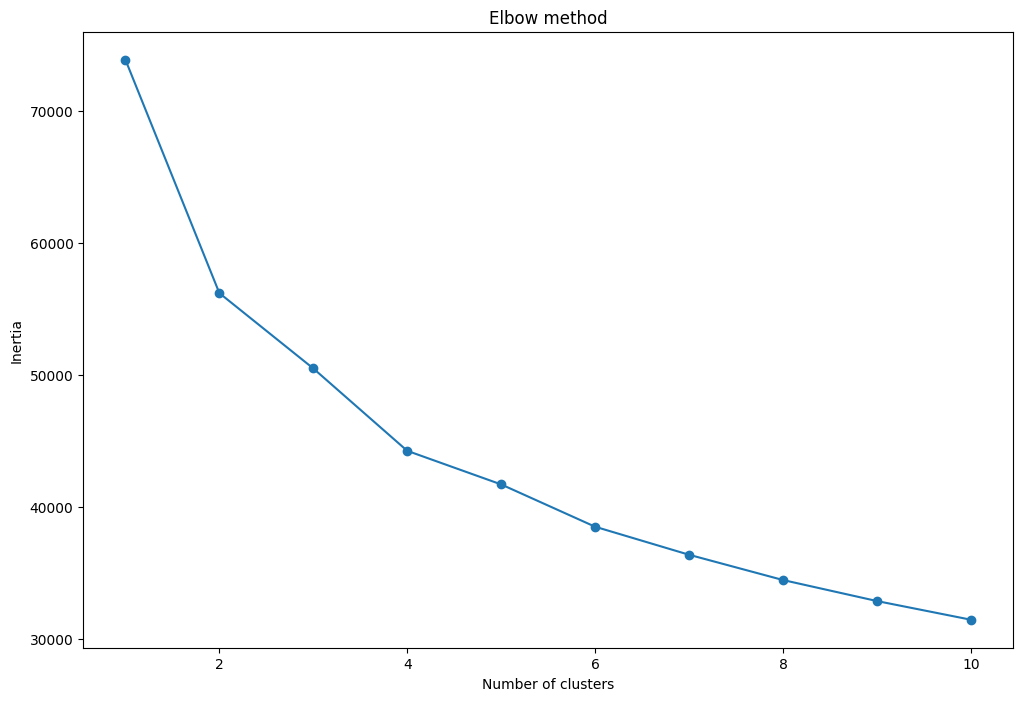

In [64]:
data = energy_scaled
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [65]:
kmeans = KMeans(n_clusters=N_CLUSTER,init='k-means++',random_state=42)

In [66]:
kmeans.fit(energy_scaled)

KMeans(n_clusters=3, random_state=42)

In [67]:
df_kmeans = energy_scaled.copy()

In [68]:
df_kmeans['k_means'] = kmeans.labels_

In [69]:
df_kmeans

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0             0.701582         0.390188           0.282245   
1            -0.065298        -0.329103           0.269734   
2            -0.976789         0.364396          -0.563570   
3             0.859447         0.974712          -0.229911   
4            -0.423954         0.272112          -0.277771   
...                ...              ...                ...   
12314        -1.147049         0.377318          -0.840912   
12315        -0.987178        -0.869413          -1.122644   
12316         2.166460        -0.701802          -0.452877   
12317        -1.059172         0.656418          -0.927077   
12318        -0.230108         0.422701          -0.767226   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  k_means  
0                  0.501495         2.777355            1.576855        0  
1                 -0.372616         0.418060            0.047695        1  
2                 -0.728603        -0.056174           -0.744960        1  
3                 -0.653975        -0.172136            0.179759        1  
4                  0.414273        -0.779727           -0.593009        1  
...                     ...              ...                 ...      ...  
12314              0.309472        -0.434149           -0.191160        2  
12315             -1.275782        -0.918192           -1.001231        1  
12316             -0.969270        -0.768910           -0.927939        1  
12317              0.207987        -0.828081           -0.929896        1  
12318             -0.139171        -0.317265           -0.270857        1  

[12319 rows x 7 columns]

In [70]:
df_kmeans['k_means'].unique()

array([0, 1, 2])

In [71]:
df_kmeans.groupby(df_kmeans['k_means']).mean() 

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
k_means                                                        
0               1.016863         0.198844           1.559481   
1              -0.042137        -0.396315          -0.277509   
2              -0.572774         1.419917          -0.038052   

         Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  
k_means                                                             
0                    1.259563         1.377164            1.408490  
1                   -0.324270        -0.248347           -0.337242  
2                    0.364536        -0.020649            0.307493

In [72]:
sil = silhouette_score(df_kmeans.iloc[:,:-1], df_kmeans['k_means'])
ch = calinski_harabasz_score(df_kmeans.iloc[:,:-1], df_kmeans['k_means'])
db = davies_bouldin_score(df_kmeans.iloc[:,:-1], df_kmeans['k_means'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.27748600808670487
Calinski-Harabasz: 2992.345790399848
Davies-Bouldin: 1.5421117070907477


### k-means with pca

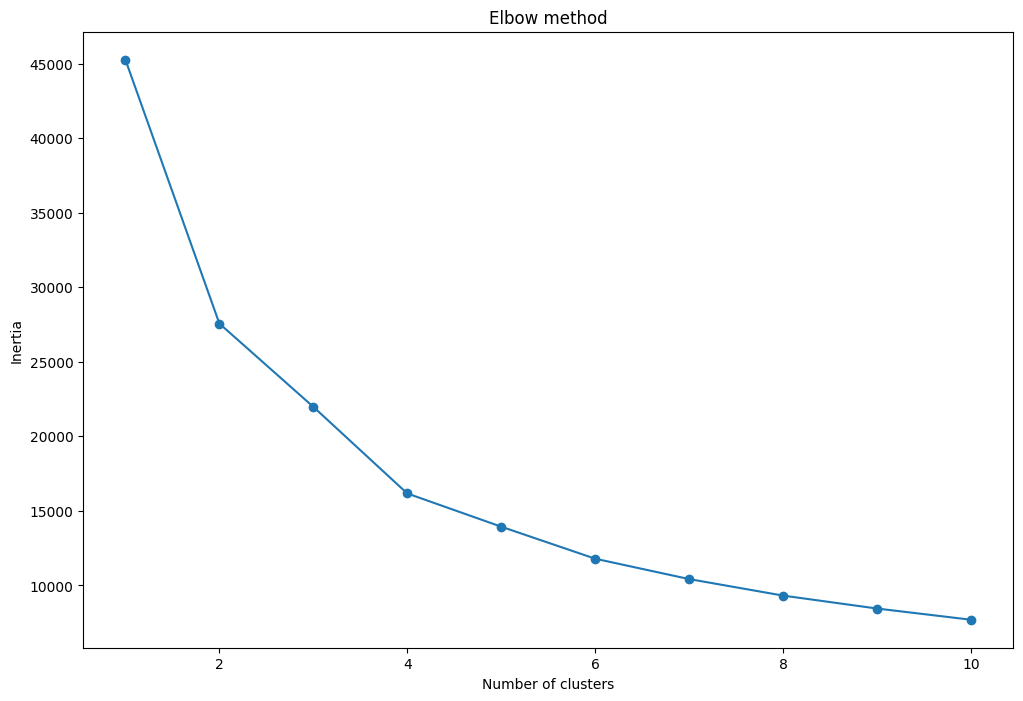

In [73]:
data = X_pca
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [74]:
kmeans_pca = KMeans(n_clusters=N_CLUSTER,init='k-means++',random_state=42)

In [75]:
kmeans_pca.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

In [76]:
df_pca_kmeans = energy_scaled.copy()

In [77]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [78]:
df_pca_kmeans

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0             0.701582         0.390188           0.282245   
1            -0.065298        -0.329103           0.269734   
2            -0.976789         0.364396          -0.563570   
3             0.859447         0.974712          -0.229911   
4            -0.423954         0.272112          -0.277771   
...                ...              ...                ...   
12314        -1.147049         0.377318          -0.840912   
12315        -0.987178        -0.869413          -1.122644   
12316         2.166460        -0.701802          -0.452877   
12317        -1.059172         0.656418          -0.927077   
12318        -0.230108         0.422701          -0.767226   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  kmeans_pca  
0                  0.501495         2.777355            1.576855           0  
1                 -0.372616         0.418060            0.047695           1  
2                 -0.728603        -0.056174           -0.744960           1  
3                 -0.653975        -0.172136            0.179759           1  
4                  0.414273        -0.779727           -0.593009           1  
...                     ...              ...                 ...         ...  
12314              0.309472        -0.434149           -0.191160           2  
12315             -1.275782        -0.918192           -1.001231           1  
12316             -0.969270        -0.768910           -0.927939           1  
12317              0.207987        -0.828081           -0.929896           1  
12318             -0.139171        -0.317265           -0.270857           1  

[12319 rows x 7 columns]

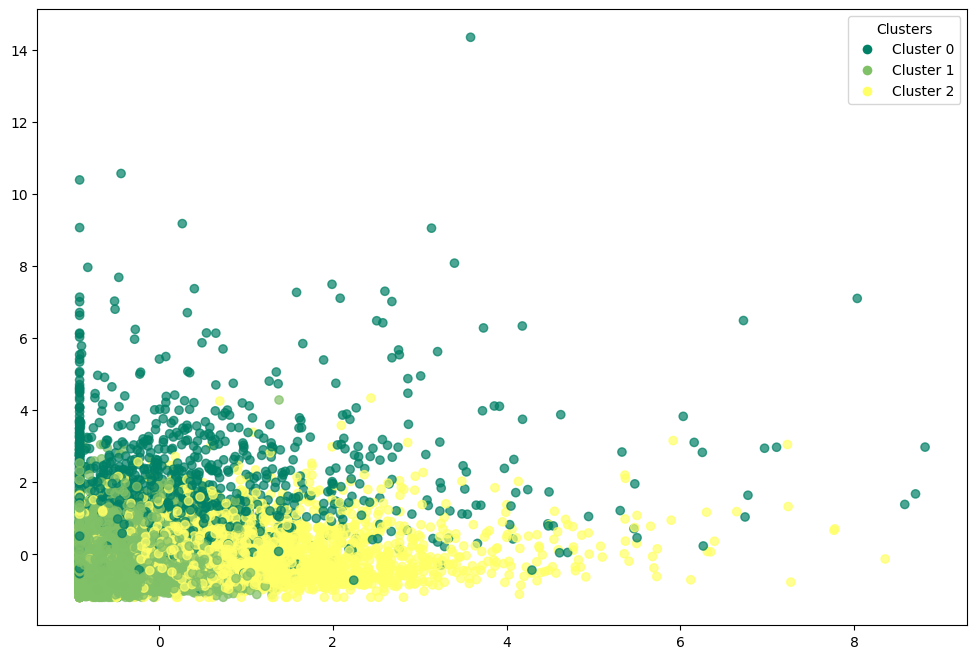

In [79]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pca_kmeans.iloc[:, 1], df_pca_kmeans.iloc[:, 2], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [80]:
df_pca_kmeans.groupby(df_pca_kmeans['kmeans_pca']).mean() 

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
kmeans_pca                                                        
0                  1.188852         0.328110           1.731973   
1                  0.003664        -0.419764          -0.291993   
2                 -0.532181         0.954178           0.002729   

            Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  
kmeans_pca                                                             
0                       1.339954         1.484612            1.500352  
1                      -0.380294        -0.277017           -0.392558  
2                       0.406110         0.072273            0.367693

In [81]:
sil = silhouette_score(df_pca_kmeans.iloc[:,:-1], df_pca_kmeans['kmeans_pca'])
ch = calinski_harabasz_score(df_pca_kmeans.iloc[:,:-1], df_pca_kmeans['kmeans_pca'])
db = davies_bouldin_score(df_pca_kmeans.iloc[:,:-1], df_pca_kmeans['kmeans_pca'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.2484769349320098
Calinski-Harabasz: 2959.8474463121497
Davies-Bouldin: 1.6578135800722524


### k-means with t-SNE

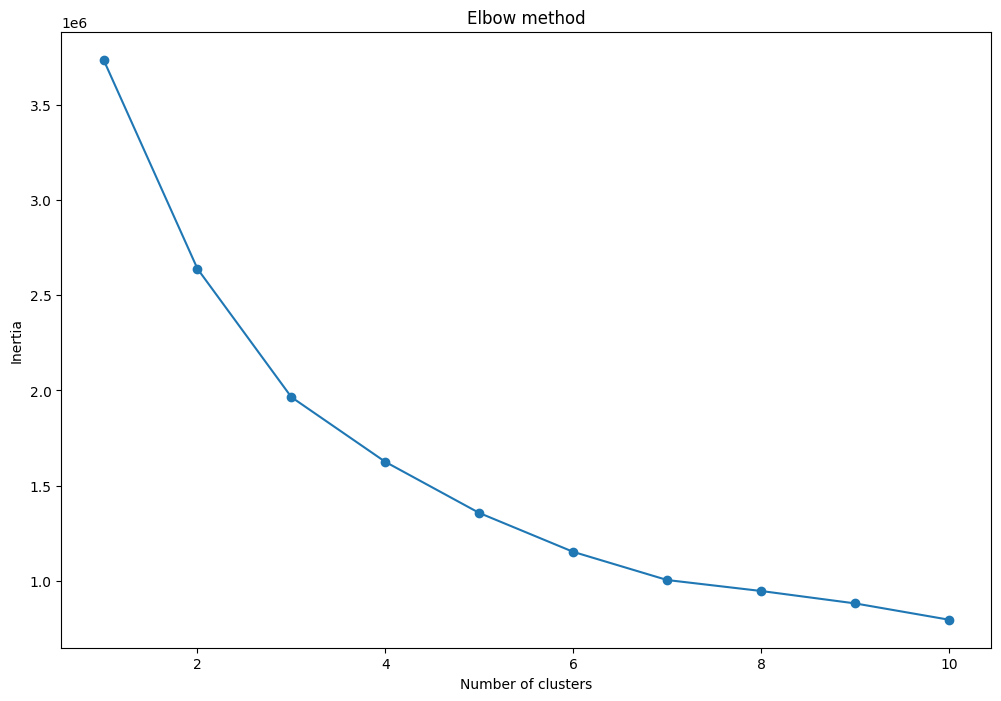

In [82]:
data = X_tsne
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [83]:
kmeans_tsne = KMeans(n_clusters=N_CLUSTER,init='k-means++',random_state=42)

In [84]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=3, random_state=42)

In [85]:
df_tsne_kmeans = energy_scaled.copy()

In [86]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [87]:
df_tsne_kmeans

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0             0.701582         0.390188           0.282245   
1            -0.065298        -0.329103           0.269734   
2            -0.976789         0.364396          -0.563570   
3             0.859447         0.974712          -0.229911   
4            -0.423954         0.272112          -0.277771   
...                ...              ...                ...   
12314        -1.147049         0.377318          -0.840912   
12315        -0.987178        -0.869413          -1.122644   
12316         2.166460        -0.701802          -0.452877   
12317        -1.059172         0.656418          -0.927077   
12318        -0.230108         0.422701          -0.767226   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  kmeans_tsne  
0                  0.501495         2.777355            1.576855            0  
1                 -0.372616         0.418060            0.047695            0  
2                 -0.728603        -0.056174           -0.744960            1  
3                 -0.653975        -0.172136            0.179759            1  
4                  0.414273        -0.779727           -0.593009            1  
...                     ...              ...                 ...          ...  
12314              0.309472        -0.434149           -0.191160            1  
12315             -1.275782        -0.918192           -1.001231            2  
12316             -0.969270        -0.768910           -0.927939            0  
12317              0.207987        -0.828081           -0.929896            1  
12318             -0.139171        -0.317265           -0.270857            1  

[12319 rows x 7 columns]

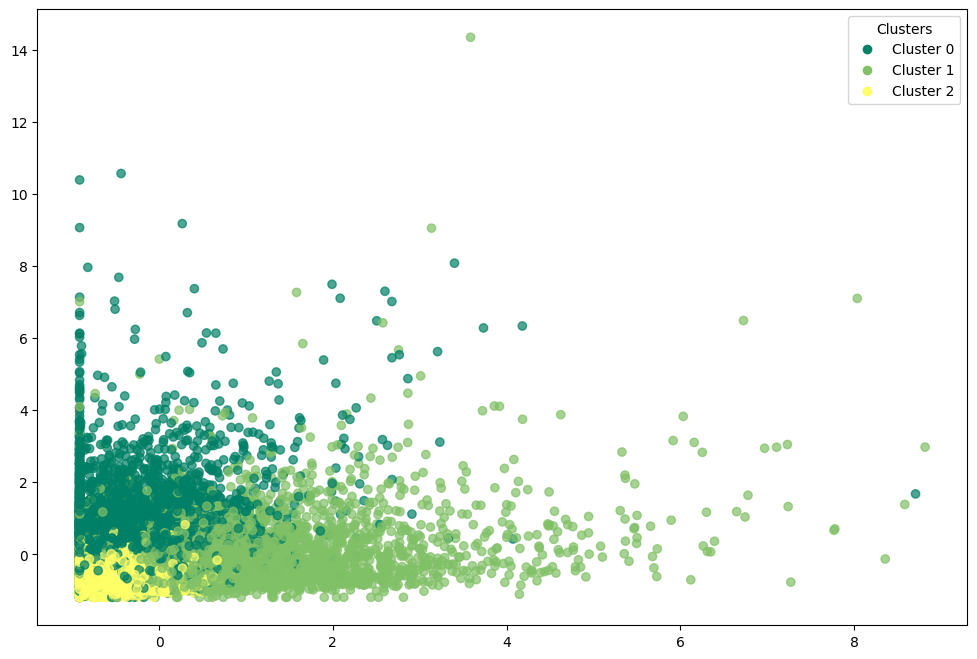

In [88]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 1], df_tsne_kmeans.iloc[:, 2], 
                      c=df_tsne_kmeans['kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [89]:
df_tsne_kmeans.groupby(df_tsne_kmeans['kmeans_tsne']).mean()

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
kmeans_tsne                                                        
0                   0.786898        -0.297947           0.581161   
1                  -0.530690         0.944677          -0.021213   
2                  -0.335151        -0.479959          -0.550021   

             Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  
kmeans_tsne                                                             
0                        0.083276         0.412344            0.168620  
1                        0.512828         0.074222            0.459723  
2                       -0.499739        -0.463093           -0.539721

In [90]:
sil = silhouette_score(df_tsne_kmeans.iloc[:,:-1], df_tsne_kmeans['kmeans_tsne'])
ch = calinski_harabasz_score(df_tsne_kmeans.iloc[:,:-1], df_tsne_kmeans['kmeans_tsne'])
db = davies_bouldin_score(df_tsne_kmeans.iloc[:,:-1], df_tsne_kmeans['kmeans_tsne'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.1315896148144367
Calinski-Harabasz: 1913.7053113735462
Davies-Bouldin: 1.9142003479793732


### k-means with umap

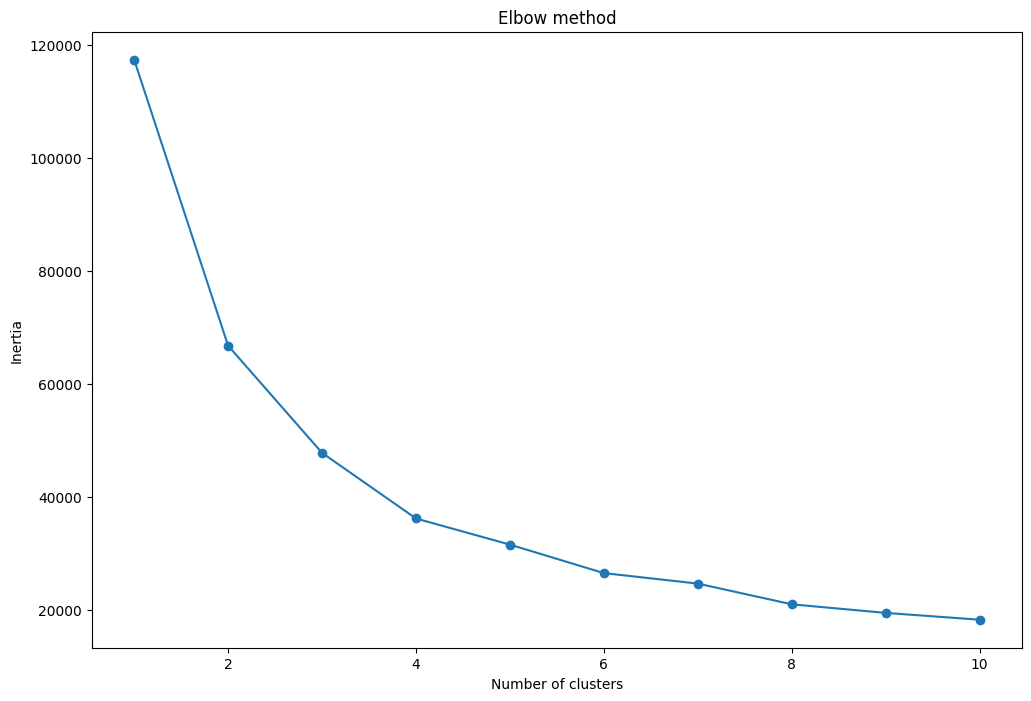

In [91]:
data = X_umap
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [92]:
kmeans_umap = KMeans(n_clusters=N_CLUSTER,init='k-means++',random_state=42)

In [93]:
kmeans_umap.fit(X_umap)

KMeans(n_clusters=3, random_state=42)

In [94]:
df_umap_kmeans = energy_scaled.copy()

In [95]:
df_umap_kmeans['kmeans_umap'] = kmeans_umap.labels_

In [96]:
df_umap_kmeans

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0             0.701582         0.390188           0.282245   
1            -0.065298        -0.329103           0.269734   
2            -0.976789         0.364396          -0.563570   
3             0.859447         0.974712          -0.229911   
4            -0.423954         0.272112          -0.277771   
...                ...              ...                ...   
12314        -1.147049         0.377318          -0.840912   
12315        -0.987178        -0.869413          -1.122644   
12316         2.166460        -0.701802          -0.452877   
12317        -1.059172         0.656418          -0.927077   
12318        -0.230108         0.422701          -0.767226   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  kmeans_umap  
0                  0.501495         2.777355            1.576855            0  
1                 -0.372616         0.418060            0.047695            0  
2                 -0.728603        -0.056174           -0.744960            2  
3                 -0.653975        -0.172136            0.179759            1  
4                  0.414273        -0.779727           -0.593009            1  
...                     ...              ...                 ...          ...  
12314              0.309472        -0.434149           -0.191160            1  
12315             -1.275782        -0.918192           -1.001231            2  
12316             -0.969270        -0.768910           -0.927939            0  
12317              0.207987        -0.828081           -0.929896            1  
12318             -0.139171        -0.317265           -0.270857            2  

[12319 rows x 7 columns]

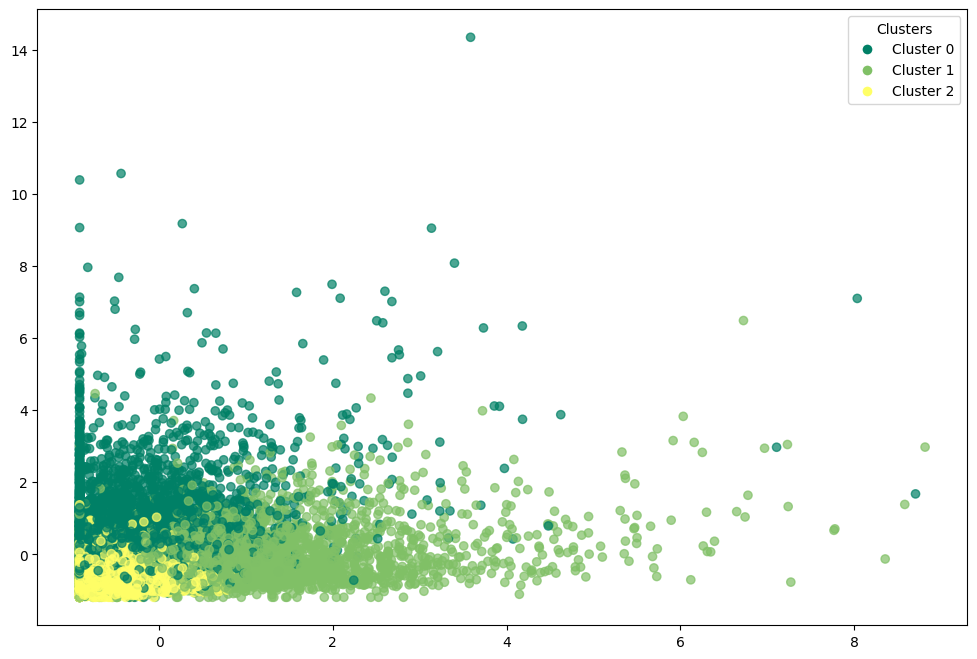

In [97]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_umap_kmeans.iloc[:, 1], df_umap_kmeans.iloc[:, 2], 
                      c=df_umap_kmeans['kmeans_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_kmeans['kmeans_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [98]:
sil = silhouette_score(df_umap_kmeans.iloc[:,:-1], df_umap_kmeans['kmeans_umap'])
ch = calinski_harabasz_score(df_umap_kmeans.iloc[:,:-1], df_umap_kmeans['kmeans_umap'])
db = davies_bouldin_score(df_umap_kmeans.iloc[:,:-1], df_umap_kmeans['kmeans_umap'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.16294884415688474
Calinski-Harabasz: 2121.0079361895805
Davies-Bouldin: 1.8488716579363917


## Birch

In [99]:
birch = Birch(branching_factor=50,n_clusters=N_CLUSTER,threshold=1.5) 

In [100]:
birch.fit(energy_scaled)

Birch(threshold=1.5)

In [101]:
df_birch = energy_scaled.copy()

In [102]:
df_birch['birch'] = birch.labels_

In [103]:
df_birch

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0             0.701582         0.390188           0.282245   
1            -0.065298        -0.329103           0.269734   
2            -0.976789         0.364396          -0.563570   
3             0.859447         0.974712          -0.229911   
4            -0.423954         0.272112          -0.277771   
...                ...              ...                ...   
12314        -1.147049         0.377318          -0.840912   
12315        -0.987178        -0.869413          -1.122644   
12316         2.166460        -0.701802          -0.452877   
12317        -1.059172         0.656418          -0.927077   
12318        -0.230108         0.422701          -0.767226   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  birch  
0                  0.501495         2.777355            1.576855      1  
1                 -0.372616         0.418060            0.047695      0  
2                 -0.728603        -0.056174           -0.744960      0  
3                 -0.653975        -0.172136            0.179759      0  
4                  0.414273        -0.779727           -0.593009      0  
...                     ...              ...                 ...    ...  
12314              0.309472        -0.434149           -0.191160      0  
12315             -1.275782        -0.918192           -1.001231      0  
12316             -0.969270        -0.768910           -0.927939      0  
12317              0.207987        -0.828081           -0.929896      0  
12318             -0.139171        -0.317265           -0.270857      0  

[12319 rows x 7 columns]

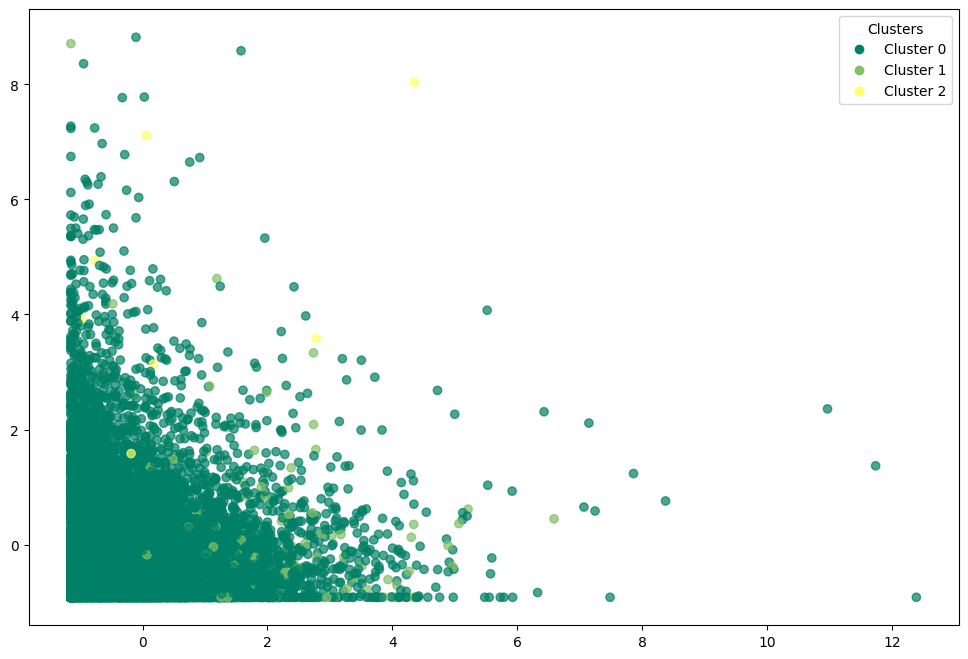

In [104]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_birch.iloc[:, 0], df_birch.iloc[:, 1], 
                      c=df_birch['birch'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_birch['birch'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [105]:
sil = silhouette_score(df_birch.iloc[:,:-1], df_birch['birch'])
ch = calinski_harabasz_score(df_birch.iloc[:,:-1], df_birch['birch'])
db = davies_bouldin_score(df_birch.iloc[:,:-1], df_birch['birch'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.5970263727470418
Calinski-Harabasz: 606.5317114032147
Davies-Bouldin: 0.9875330323072026


### Birch with pca

In [106]:
birch_pca = Birch(branching_factor=50,n_clusters=N_CLUSTER,threshold=1.5) 

In [107]:
birch_pca.fit(X_pca)

Birch(threshold=1.5)

In [108]:
df_pca_birch = energy_scaled.copy()

In [109]:
df_pca_birch["birch_pca"] = birch_pca.labels_

In [110]:
df_pca_birch

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0             0.701582         0.390188           0.282245   
1            -0.065298        -0.329103           0.269734   
2            -0.976789         0.364396          -0.563570   
3             0.859447         0.974712          -0.229911   
4            -0.423954         0.272112          -0.277771   
...                ...              ...                ...   
12314        -1.147049         0.377318          -0.840912   
12315        -0.987178        -0.869413          -1.122644   
12316         2.166460        -0.701802          -0.452877   
12317        -1.059172         0.656418          -0.927077   
12318        -0.230108         0.422701          -0.767226   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  birch_pca  
0                  0.501495         2.777355            1.576855          0  
1                 -0.372616         0.418060            0.047695          0  
2                 -0.728603        -0.056174           -0.744960          0  
3                 -0.653975        -0.172136            0.179759          0  
4                  0.414273        -0.779727           -0.593009          0  
...                     ...              ...                 ...        ...  
12314              0.309472        -0.434149           -0.191160          0  
12315             -1.275782        -0.918192           -1.001231          0  
12316             -0.969270        -0.768910           -0.927939          0  
12317              0.207987        -0.828081           -0.929896          0  
12318             -0.139171        -0.317265           -0.270857          0  

[12319 rows x 7 columns]

In [111]:
sil = silhouette_score(df_pca_birch.iloc[:,:-1], df_pca_birch['birch_pca'])
ch = calinski_harabasz_score(df_pca_birch.iloc[:,:-1], df_pca_birch['birch_pca'])
db = davies_bouldin_score(df_pca_birch.iloc[:,:-1], df_pca_birch['birch_pca'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.7664540434662521
Calinski-Harabasz: 258.93972758684407
Davies-Bouldin: 0.9719728090178847


### Birch with t-SNE

In [112]:
birch_tsne = Birch(branching_factor=50,n_clusters=N_CLUSTER,threshold=1.5) 

In [113]:
birch_tsne.fit(X_tsne)

Birch(threshold=1.5)

In [114]:
df_tsne_birch = energy_scaled.copy()

In [115]:
df_tsne_birch['birch_tsne'] = birch_tsne.labels_

In [116]:
df_tsne_birch

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0             0.701582         0.390188           0.282245   
1            -0.065298        -0.329103           0.269734   
2            -0.976789         0.364396          -0.563570   
3             0.859447         0.974712          -0.229911   
4            -0.423954         0.272112          -0.277771   
...                ...              ...                ...   
12314        -1.147049         0.377318          -0.840912   
12315        -0.987178        -0.869413          -1.122644   
12316         2.166460        -0.701802          -0.452877   
12317        -1.059172         0.656418          -0.927077   
12318        -0.230108         0.422701          -0.767226   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  birch_tsne  
0                  0.501495         2.777355            1.576855           0  
1                 -0.372616         0.418060            0.047695           0  
2                 -0.728603        -0.056174           -0.744960           1  
3                 -0.653975        -0.172136            0.179759           1  
4                  0.414273        -0.779727           -0.593009           1  
...                     ...              ...                 ...         ...  
12314              0.309472        -0.434149           -0.191160           1  
12315             -1.275782        -0.918192           -1.001231           2  
12316             -0.969270        -0.768910           -0.927939           0  
12317              0.207987        -0.828081           -0.929896           1  
12318             -0.139171        -0.317265           -0.270857           1  

[12319 rows x 7 columns]

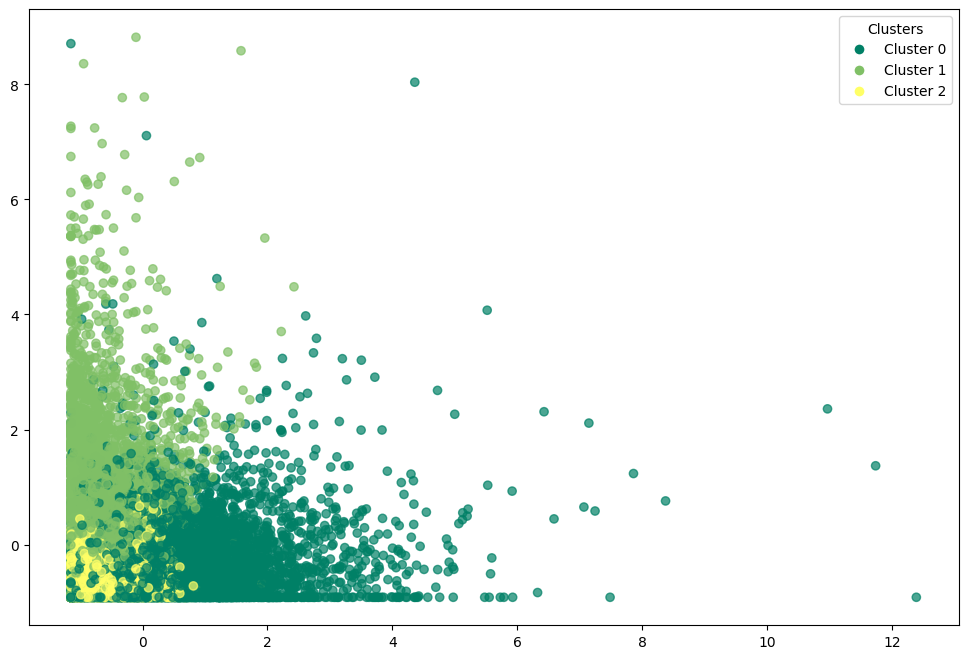

In [117]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_tsne_birch.iloc[:, 0], df_tsne_birch.iloc[:, 1], 
                      c=df_tsne_birch['birch_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_birch['birch_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [118]:
sil = silhouette_score(df_tsne_birch.iloc[:,:-1], df_tsne_birch['birch_tsne'])
ch = calinski_harabasz_score(df_tsne_birch.iloc[:,:-1], df_tsne_birch['birch_tsne'])
db = davies_bouldin_score(df_tsne_birch.iloc[:,:-1], df_tsne_birch['birch_tsne'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.03354379182272704
Calinski-Harabasz: 1443.7874939393841
Davies-Bouldin: 1.9569247043778908


### Birch with umap

In [119]:
birch_umap = Birch(branching_factor=50,n_clusters=N_CLUSTER,threshold=1.5) 

In [120]:
birch_umap.fit(X_umap)

Birch(threshold=1.5)

In [121]:
df_umap_birch = energy_scaled.copy()

In [122]:
df_umap_birch['birch_umap'] = birch_umap.labels_

In [123]:
df_umap_birch

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0             0.701582         0.390188           0.282245   
1            -0.065298        -0.329103           0.269734   
2            -0.976789         0.364396          -0.563570   
3             0.859447         0.974712          -0.229911   
4            -0.423954         0.272112          -0.277771   
...                ...              ...                ...   
12314        -1.147049         0.377318          -0.840912   
12315        -0.987178        -0.869413          -1.122644   
12316         2.166460        -0.701802          -0.452877   
12317        -1.059172         0.656418          -0.927077   
12318        -0.230108         0.422701          -0.767226   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  birch_umap  
0                  0.501495         2.777355            1.576855           0  
1                 -0.372616         0.418060            0.047695           0  
2                 -0.728603        -0.056174           -0.744960           2  
3                 -0.653975        -0.172136            0.179759           2  
4                  0.414273        -0.779727           -0.593009           2  
...                     ...              ...                 ...         ...  
12314              0.309472        -0.434149           -0.191160           2  
12315             -1.275782        -0.918192           -1.001231           1  
12316             -0.969270        -0.768910           -0.927939           0  
12317              0.207987        -0.828081           -0.929896           2  
12318             -0.139171        -0.317265           -0.270857           2  

[12319 rows x 7 columns]

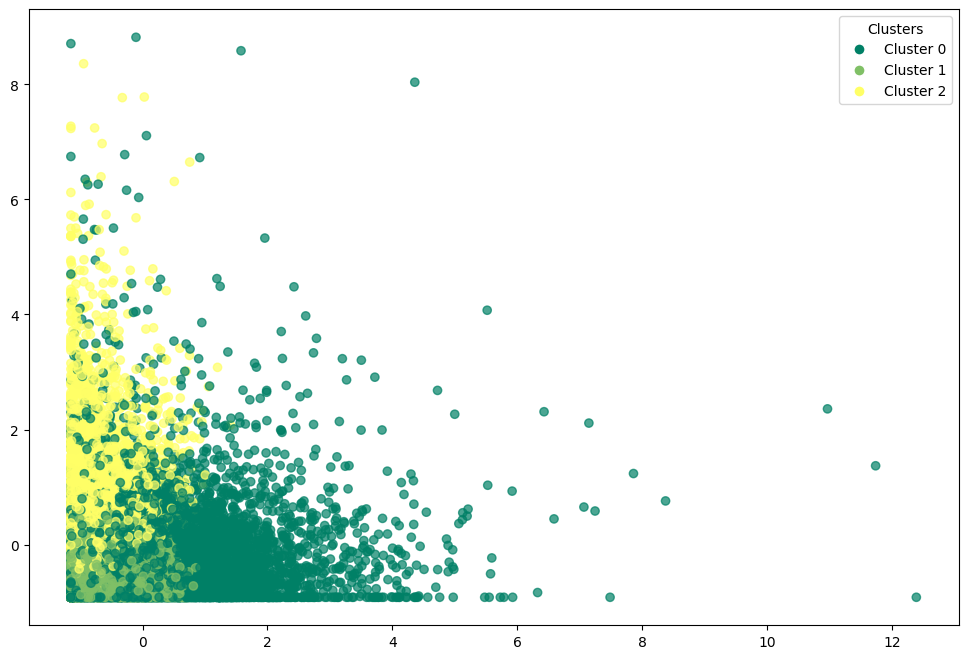

In [124]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_umap_birch.iloc[:, 0], df_umap_birch.iloc[:, 1], 
                      c=df_umap_birch['birch_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_birch['birch_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [125]:
sil = silhouette_score(df_umap_birch.iloc[:,:-1], df_umap_birch['birch_umap'])
ch = calinski_harabasz_score(df_umap_birch.iloc[:,:-1], df_umap_birch['birch_umap'])
db = davies_bouldin_score(df_umap_birch.iloc[:,:-1], df_umap_birch['birch_umap'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.07135685236492757
Calinski-Harabasz: 1658.5050071353137
Davies-Bouldin: 1.7688465252301535


## GMM - Gaussian Mixture Models

In [126]:
gmm = GaussianMixture(n_components=N_CLUSTER,init_params='k-means++',random_state=42)

In [127]:
gmm.fit(energy_scaled)

GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

In [128]:
df_gmm = energy_scaled.copy()

In [129]:
df_gmm['gmm'] = gmm.predict(energy_scaled)

In [130]:
df_gmm

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0             0.701582         0.390188           0.282245   
1            -0.065298        -0.329103           0.269734   
2            -0.976789         0.364396          -0.563570   
3             0.859447         0.974712          -0.229911   
4            -0.423954         0.272112          -0.277771   
...                ...              ...                ...   
12314        -1.147049         0.377318          -0.840912   
12315        -0.987178        -0.869413          -1.122644   
12316         2.166460        -0.701802          -0.452877   
12317        -1.059172         0.656418          -0.927077   
12318        -0.230108         0.422701          -0.767226   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  gmm  
0                  0.501495         2.777355            1.576855    0  
1                 -0.372616         0.418060            0.047695    2  
2                 -0.728603        -0.056174           -0.744960    2  
3                 -0.653975        -0.172136            0.179759    2  
4                  0.414273        -0.779727           -0.593009    2  
...                     ...              ...                 ...  ...  
12314              0.309472        -0.434149           -0.191160    1  
12315             -1.275782        -0.918192           -1.001231    1  
12316             -0.969270        -0.768910           -0.927939    1  
12317              0.207987        -0.828081           -0.929896    2  
12318             -0.139171        -0.317265           -0.270857    1  

[12319 rows x 7 columns]

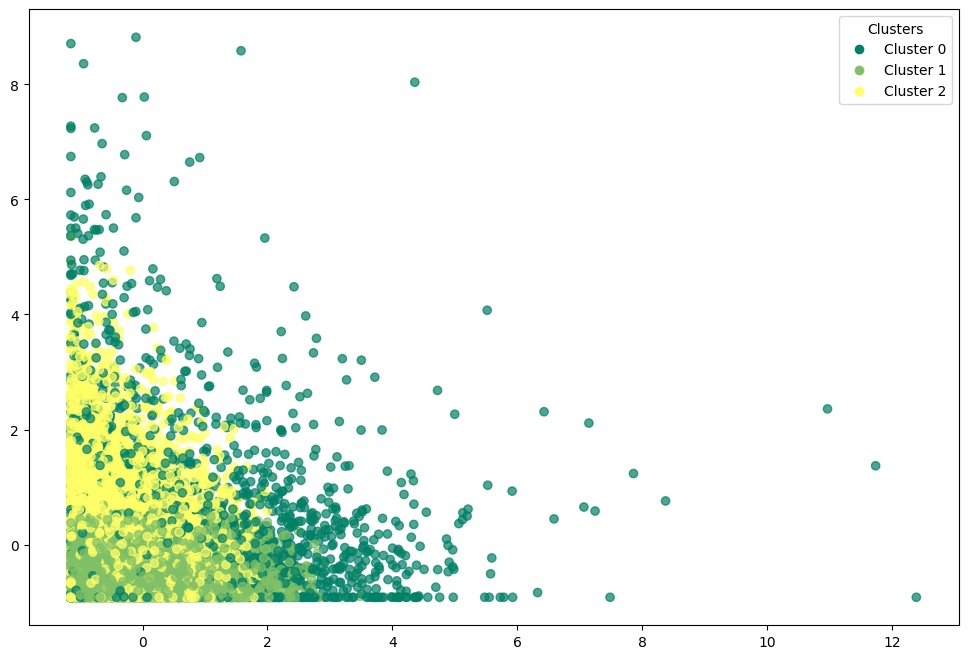

In [131]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_gmm.iloc[:, 0], df_gmm.iloc[:, 1], 
                      c=df_gmm['gmm'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_gmm['gmm'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [132]:
sil = silhouette_score(df_gmm.iloc[:,:-1], df_gmm['gmm'])
ch = calinski_harabasz_score(df_gmm.iloc[:,:-1], df_gmm['gmm'])
db = davies_bouldin_score(df_gmm.iloc[:,:-1], df_gmm['gmm'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.15577656450624353
Calinski-Harabasz: 2360.225542155189
Davies-Bouldin: 2.0503148452161235


### GMM with pca

In [133]:
gmm_pca = GaussianMixture(n_components=N_CLUSTER,init_params='k-means++',random_state=42)

In [134]:
gmm_pca.fit(X_pca)

GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

In [135]:
df_pca_gmm = energy_scaled.copy()

In [136]:
df_pca_gmm['gmm_pca'] = gmm_pca.predict(X_pca)

In [137]:
df_pca_gmm

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0             0.701582         0.390188           0.282245   
1            -0.065298        -0.329103           0.269734   
2            -0.976789         0.364396          -0.563570   
3             0.859447         0.974712          -0.229911   
4            -0.423954         0.272112          -0.277771   
...                ...              ...                ...   
12314        -1.147049         0.377318          -0.840912   
12315        -0.987178        -0.869413          -1.122644   
12316         2.166460        -0.701802          -0.452877   
12317        -1.059172         0.656418          -0.927077   
12318        -0.230108         0.422701          -0.767226   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  gmm_pca  
0                  0.501495         2.777355            1.576855        0  
1                 -0.372616         0.418060            0.047695        2  
2                 -0.728603        -0.056174           -0.744960        1  
3                 -0.653975        -0.172136            0.179759        2  
4                  0.414273        -0.779727           -0.593009        2  
...                     ...              ...                 ...      ...  
12314              0.309472        -0.434149           -0.191160        2  
12315             -1.275782        -0.918192           -1.001231        1  
12316             -0.969270        -0.768910           -0.927939        2  
12317              0.207987        -0.828081           -0.929896        2  
12318             -0.139171        -0.317265           -0.270857        1  

[12319 rows x 7 columns]

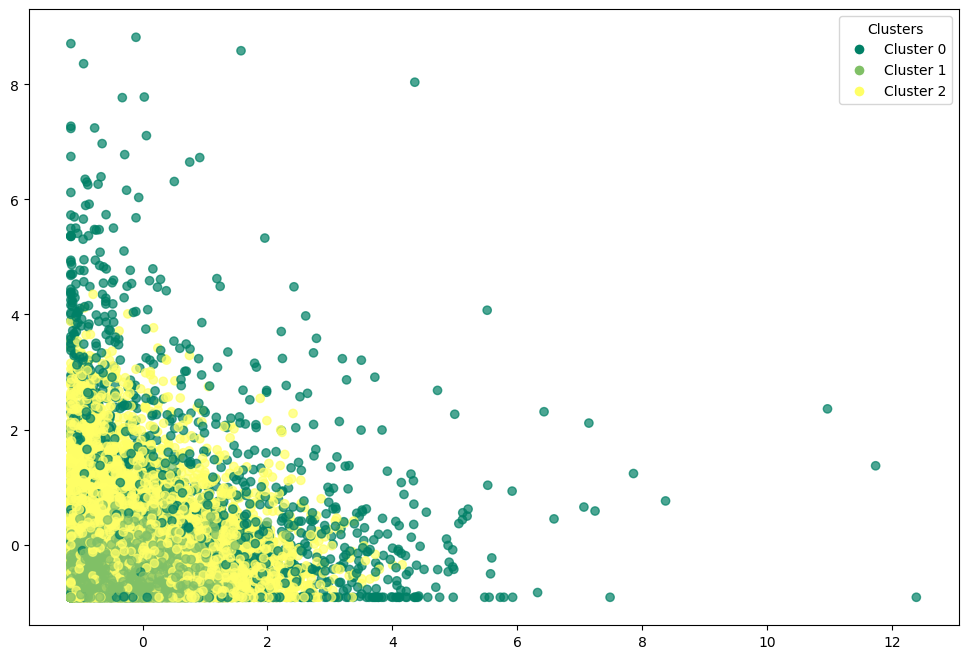

In [138]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pca_gmm.iloc[:, 0], df_pca_gmm.iloc[:, 1], 
                      c=df_pca_gmm['gmm_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_gmm['gmm_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [139]:
sil = silhouette_score(df_pca_gmm.iloc[:,:-1], df_pca_gmm['gmm_pca'])
ch = calinski_harabasz_score(df_pca_gmm.iloc[:,:-1], df_pca_gmm['gmm_pca'])
db = davies_bouldin_score(df_pca_gmm.iloc[:,:-1], df_pca_gmm['gmm_pca'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.15980054321987816
Calinski-Harabasz: 2552.775349717543
Davies-Bouldin: 1.9693868145451727


### GMM with t-SNE

In [140]:
gmm_tsne = GaussianMixture(n_components=N_CLUSTER,init_params='k-means++',random_state=42)

In [141]:
gmm_tsne.fit(X_tsne)

GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

In [142]:
df_tsne_gmm = energy_scaled.copy()

In [143]:
df_tsne_gmm['gmm_tsne'] = gmm_tsne.predict(X_tsne)

In [144]:
df_tsne_gmm

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0             0.701582         0.390188           0.282245   
1            -0.065298        -0.329103           0.269734   
2            -0.976789         0.364396          -0.563570   
3             0.859447         0.974712          -0.229911   
4            -0.423954         0.272112          -0.277771   
...                ...              ...                ...   
12314        -1.147049         0.377318          -0.840912   
12315        -0.987178        -0.869413          -1.122644   
12316         2.166460        -0.701802          -0.452877   
12317        -1.059172         0.656418          -0.927077   
12318        -0.230108         0.422701          -0.767226   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  gmm_tsne  
0                  0.501495         2.777355            1.576855         1  
1                 -0.372616         0.418060            0.047695         1  
2                 -0.728603        -0.056174           -0.744960         1  
3                 -0.653975        -0.172136            0.179759         1  
4                  0.414273        -0.779727           -0.593009         2  
...                     ...              ...                 ...       ...  
12314              0.309472        -0.434149           -0.191160         2  
12315             -1.275782        -0.918192           -1.001231         2  
12316             -0.969270        -0.768910           -0.927939         0  
12317              0.207987        -0.828081           -0.929896         1  
12318             -0.139171        -0.317265           -0.270857         2  

[12319 rows x 7 columns]

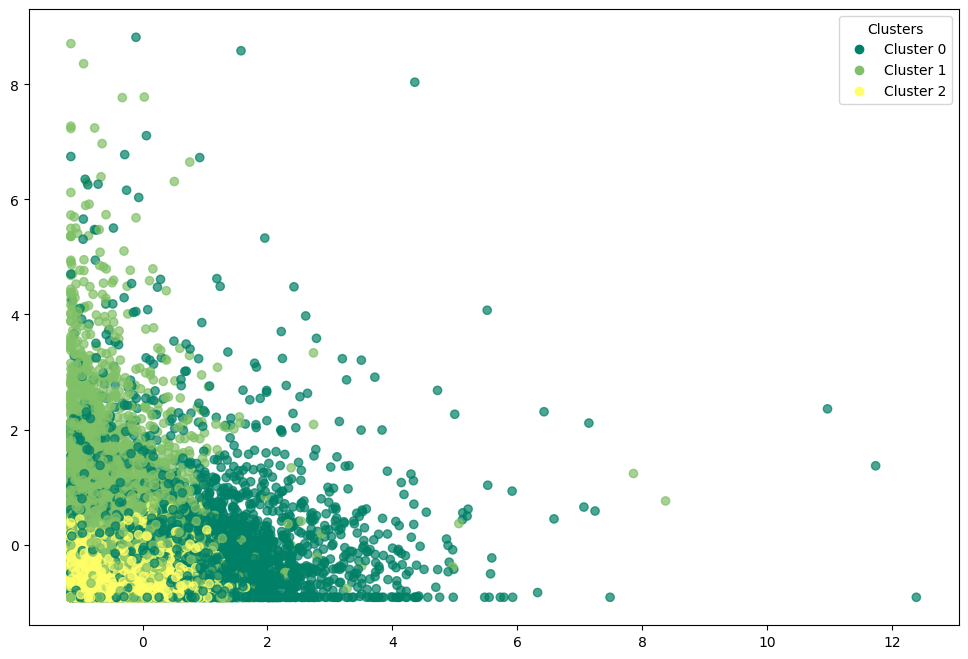

In [145]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_tsne_gmm.iloc[:, 0], df_tsne_gmm.iloc[:, 1], 
                      c=df_tsne_gmm['gmm_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_gmm['gmm_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [146]:
sil = silhouette_score(df_tsne_gmm.iloc[:,:-1], df_tsne_gmm['gmm_tsne'])
ch = calinski_harabasz_score(df_tsne_gmm.iloc[:,:-1], df_tsne_gmm['gmm_tsne'])
db = davies_bouldin_score(df_tsne_gmm.iloc[:,:-1], df_tsne_gmm['gmm_tsne'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.1198213893666835
Calinski-Harabasz: 1805.8156226868205
Davies-Bouldin: 2.1346340245730793


### GMM with umap

In [147]:
gmm_umap = GaussianMixture(n_components=N_CLUSTER,init_params='k-means++',random_state=42)

In [148]:
gmm_umap.fit(X_umap)

GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

In [149]:
df_umap_gmm = energy_scaled.copy()

In [150]:
df_umap_gmm['gmm_umap'] = gmm_umap.predict(X_umap)

In [151]:
df_umap_gmm

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0             0.701582         0.390188           0.282245   
1            -0.065298        -0.329103           0.269734   
2            -0.976789         0.364396          -0.563570   
3             0.859447         0.974712          -0.229911   
4            -0.423954         0.272112          -0.277771   
...                ...              ...                ...   
12314        -1.147049         0.377318          -0.840912   
12315        -0.987178        -0.869413          -1.122644   
12316         2.166460        -0.701802          -0.452877   
12317        -1.059172         0.656418          -0.927077   
12318        -0.230108         0.422701          -0.767226   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  gmm_umap  
0                  0.501495         2.777355            1.576855         0  
1                 -0.372616         0.418060            0.047695         1  
2                 -0.728603        -0.056174           -0.744960         1  
3                 -0.653975        -0.172136            0.179759         1  
4                  0.414273        -0.779727           -0.593009         1  
...                     ...              ...                 ...       ...  
12314              0.309472        -0.434149           -0.191160         1  
12315             -1.275782        -0.918192           -1.001231         2  
12316             -0.969270        -0.768910           -0.927939         0  
12317              0.207987        -0.828081           -0.929896         1  
12318             -0.139171        -0.317265           -0.270857         1  

[12319 rows x 7 columns]

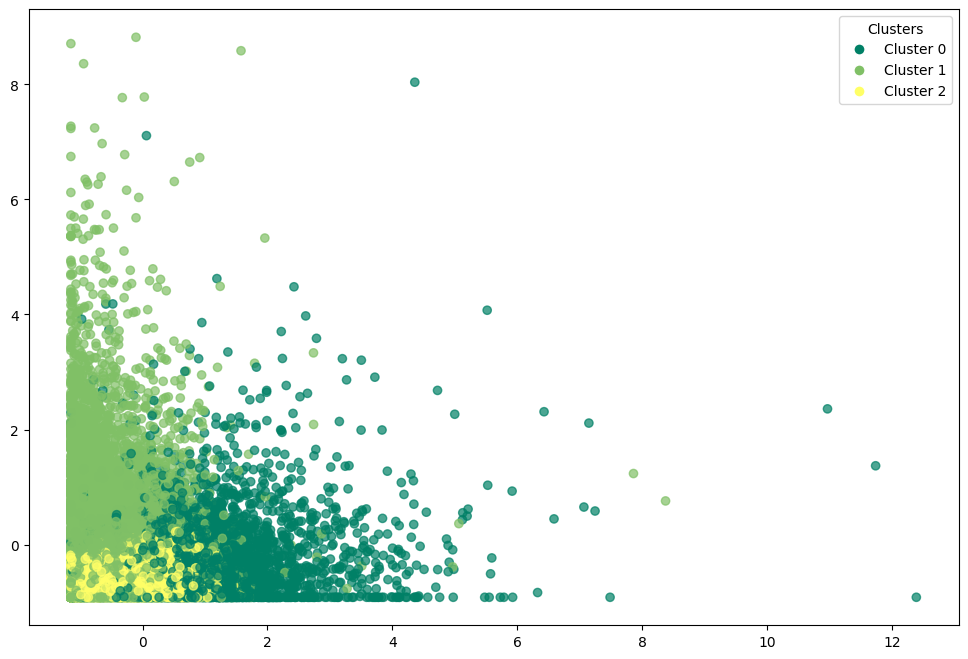

In [152]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_umap_gmm.iloc[:, 0], df_umap_gmm.iloc[:, 1], 
                      c=df_umap_gmm['gmm_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_gmm['gmm_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [153]:
sil = silhouette_score(df_umap_gmm.iloc[:,:-1], df_umap_gmm['gmm_umap'])
ch = calinski_harabasz_score(df_umap_gmm.iloc[:,:-1], df_umap_gmm['gmm_umap'])
db = davies_bouldin_score(df_umap_gmm.iloc[:,:-1], df_umap_gmm['gmm_umap'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.06620913204970916
Calinski-Harabasz: 1721.2889265558126
Davies-Bouldin: 1.9169608171400692


## pam

In [154]:
initial_medoids = np.random.choice(len(energy_scaled),N_CLUSTER,replace=False)

In [155]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [156]:
pam = kmedoids(energy_scaled.values.tolist(),initial_medoids,metric=metric)

In [157]:
pam.process()

In [158]:
clusters = pam.get_clusters()

In [159]:
medoids = pam.get_medoids()

In [160]:
labels = np.zeros(len(energy_scaled))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [161]:
df_pam = energy_scaled.copy()

In [162]:
df_pam['pam'] = labels

In [163]:
df_pam

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0             0.701582         0.390188           0.282245   
1            -0.065298        -0.329103           0.269734   
2            -0.976789         0.364396          -0.563570   
3             0.859447         0.974712          -0.229911   
4            -0.423954         0.272112          -0.277771   
...                ...              ...                ...   
12314        -1.147049         0.377318          -0.840912   
12315        -0.987178        -0.869413          -1.122644   
12316         2.166460        -0.701802          -0.452877   
12317        -1.059172         0.656418          -0.927077   
12318        -0.230108         0.422701          -0.767226   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  pam  
0                  0.501495         2.777355            1.576855  1.0  
1                 -0.372616         0.418060            0.047695  1.0  
2                 -0.728603        -0.056174           -0.744960  2.0  
3                 -0.653975        -0.172136            0.179759  2.0  
4                  0.414273        -0.779727           -0.593009  2.0  
...                     ...              ...                 ...  ...  
12314              0.309472        -0.434149           -0.191160  0.0  
12315             -1.275782        -0.918192           -1.001231  2.0  
12316             -0.969270        -0.768910           -0.927939  2.0  
12317              0.207987        -0.828081           -0.929896  2.0  
12318             -0.139171        -0.317265           -0.270857  2.0  

[12319 rows x 7 columns]

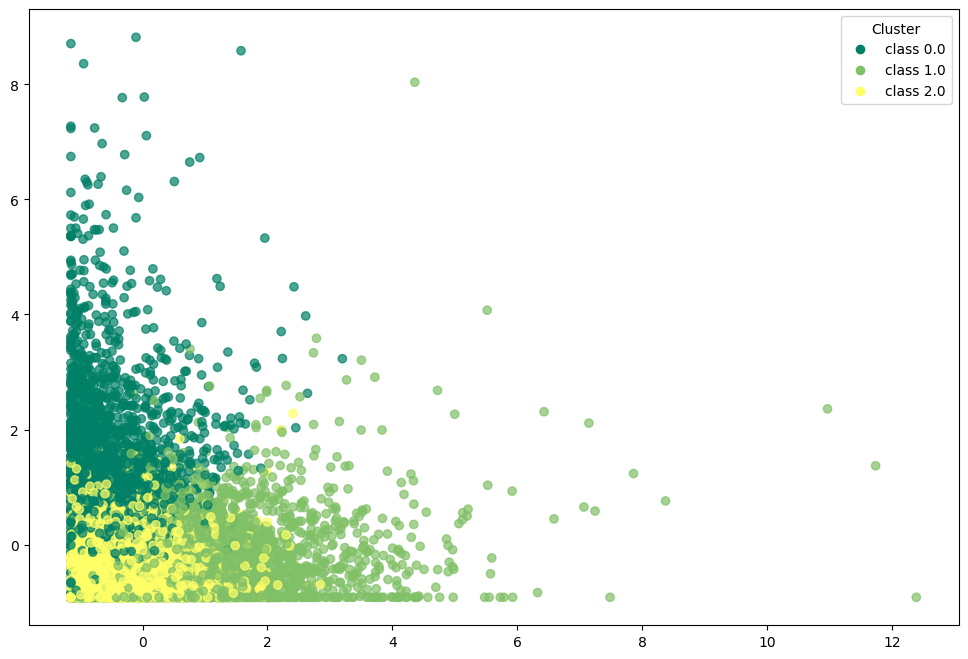

In [164]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pam.iloc[:, 0],df_pam.iloc[:, 1], 
                      c=df_pam['pam'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam['pam'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [165]:
sil = silhouette_score(df_pam.iloc[:,:-1], df_pam['pam'])
ch = calinski_harabasz_score(df_pam.iloc[:,:-1], df_pam['pam'])
db = davies_bouldin_score(df_pam.iloc[:,:-1], df_pam['pam'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.24361492943960517
Calinski-Harabasz: 2548.2250242028235
Davies-Bouldin: 1.7683075876285173


### pam with pca

In [166]:
initial_medoids = np.random.choice(len(X_pca),N_CLUSTER,replace=False)

In [167]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [168]:
pam_pca = kmedoids(X_pca.values.tolist(),initial_medoids,metric=metric)

In [169]:
pam_pca.process()

In [170]:
clusters = pam_pca.get_clusters()

In [171]:
medoids = pam_pca.get_medoids()

In [172]:
labels = np.zeros(len(X_pca))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [173]:
df_pam_pca = energy_scaled.copy()

In [174]:
df_pam_pca['pam_pca'] = labels

In [175]:
df_pam_pca

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0             0.701582         0.390188           0.282245   
1            -0.065298        -0.329103           0.269734   
2            -0.976789         0.364396          -0.563570   
3             0.859447         0.974712          -0.229911   
4            -0.423954         0.272112          -0.277771   
...                ...              ...                ...   
12314        -1.147049         0.377318          -0.840912   
12315        -0.987178        -0.869413          -1.122644   
12316         2.166460        -0.701802          -0.452877   
12317        -1.059172         0.656418          -0.927077   
12318        -0.230108         0.422701          -0.767226   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  pam_pca  
0                  0.501495         2.777355            1.576855      1.0  
1                 -0.372616         0.418060            0.047695      2.0  
2                 -0.728603        -0.056174           -0.744960      2.0  
3                 -0.653975        -0.172136            0.179759      0.0  
4                  0.414273        -0.779727           -0.593009      0.0  
...                     ...              ...                 ...      ...  
12314              0.309472        -0.434149           -0.191160      0.0  
12315             -1.275782        -0.918192           -1.001231      2.0  
12316             -0.969270        -0.768910           -0.927939      2.0  
12317              0.207987        -0.828081           -0.929896      0.0  
12318             -0.139171        -0.317265           -0.270857      0.0  

[12319 rows x 7 columns]

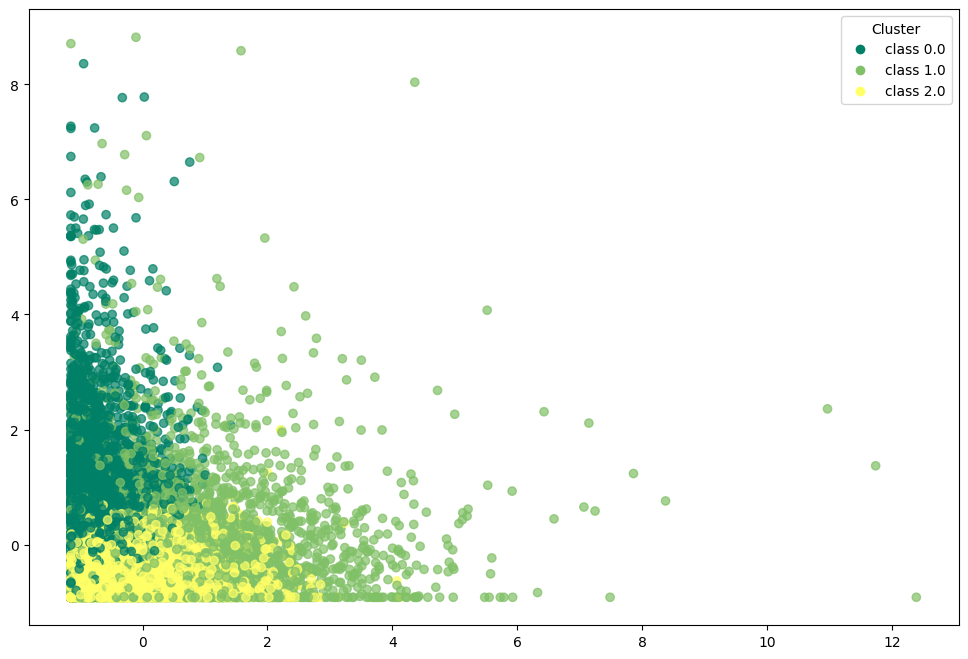

In [176]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pam_pca.iloc[:, 0],df_pam_pca.iloc[:, 1], 
                      c=df_pam_pca['pam_pca'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_pca['pam_pca'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [177]:
sil = silhouette_score(df_pam_pca.iloc[:,:-1], df_pam_pca['pam_pca'])
ch = calinski_harabasz_score(df_pam_pca.iloc[:,:-1], df_pam_pca['pam_pca'])
db = davies_bouldin_score(df_pam_pca.iloc[:,:-1], df_pam_pca['pam_pca'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.20036363534890753
Calinski-Harabasz: 2695.116460281471
Davies-Bouldin: 1.6734341658534166


### pam with t-SNE

In [178]:
initial_medoids = np.random.choice(len(X_tsne),N_CLUSTER,replace=False)

In [179]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [180]:
pam_tsne = kmedoids(X_tsne.values.tolist(),initial_medoids,metric=metric)

In [181]:
pam_tsne.process()

In [182]:
clusters = pam_tsne.get_clusters()

In [183]:
medoids = pam_tsne.get_medoids()

In [184]:
labels = np.zeros(len(X_tsne))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [185]:
df_pam_tsne = energy_scaled.copy()

In [186]:
df_pam_tsne['pam_tsne'] = labels

In [187]:
df_pam_tsne

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0             0.701582         0.390188           0.282245   
1            -0.065298        -0.329103           0.269734   
2            -0.976789         0.364396          -0.563570   
3             0.859447         0.974712          -0.229911   
4            -0.423954         0.272112          -0.277771   
...                ...              ...                ...   
12314        -1.147049         0.377318          -0.840912   
12315        -0.987178        -0.869413          -1.122644   
12316         2.166460        -0.701802          -0.452877   
12317        -1.059172         0.656418          -0.927077   
12318        -0.230108         0.422701          -0.767226   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  pam_tsne  
0                  0.501495         2.777355            1.576855       2.0  
1                 -0.372616         0.418060            0.047695       2.0  
2                 -0.728603        -0.056174           -0.744960       0.0  
3                 -0.653975        -0.172136            0.179759       0.0  
4                  0.414273        -0.779727           -0.593009       0.0  
...                     ...              ...                 ...       ...  
12314              0.309472        -0.434149           -0.191160       0.0  
12315             -1.275782        -0.918192           -1.001231       1.0  
12316             -0.969270        -0.768910           -0.927939       2.0  
12317              0.207987        -0.828081           -0.929896       0.0  
12318             -0.139171        -0.317265           -0.270857       0.0  

[12319 rows x 7 columns]

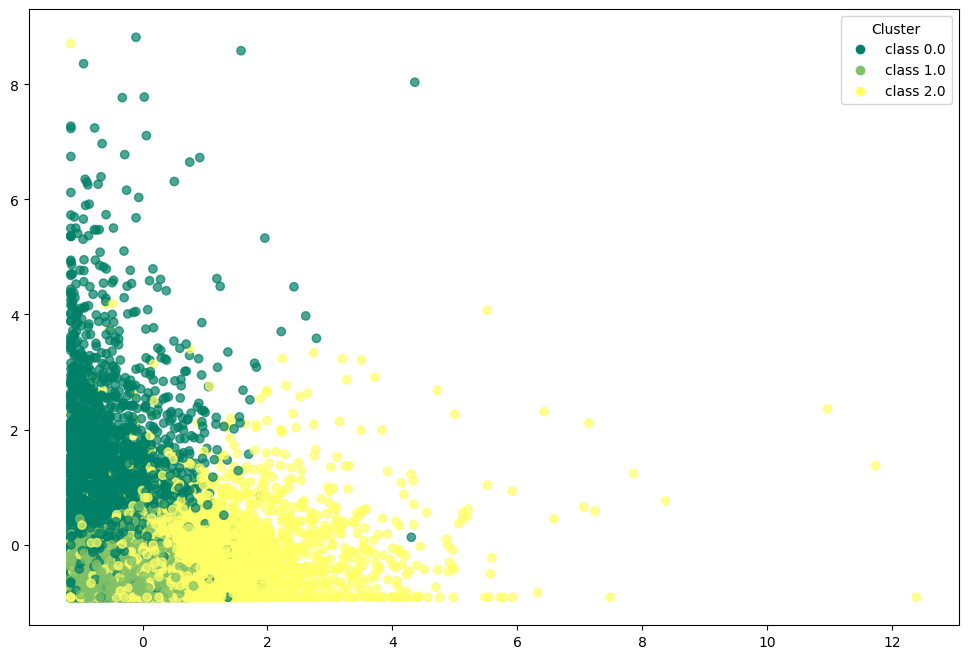

In [188]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pam_tsne.iloc[:, 0],df_pam_tsne.iloc[:, 1], 
                      c=df_pam_tsne['pam_tsne'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_tsne['pam_tsne'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [189]:
sil = silhouette_score(df_pam_tsne.iloc[:,:-1], df_pam_tsne['pam_tsne'])
ch = calinski_harabasz_score(df_pam_tsne.iloc[:,:-1], df_pam_tsne['pam_tsne'])
db = davies_bouldin_score(df_pam_tsne.iloc[:,:-1], df_pam_tsne['pam_tsne'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.12710720398857248
Calinski-Harabasz: 1920.7813591551396
Davies-Bouldin: 1.8884198091788658


### pam with umap

In [190]:
initial_medoids = np.random.choice(len(X_umap),N_CLUSTER,replace=False)

In [191]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [192]:
pam_umap = kmedoids(X_umap.values.tolist(),initial_medoids,metric=metric)

In [193]:
pam_umap.process()

In [194]:
clusters = pam_umap.get_clusters()

In [195]:
medoids = pam_umap.get_medoids()

In [196]:
labels = np.zeros(len(X_umap))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [197]:
df_pam_umap = energy_scaled.copy()

In [198]:
df_pam_umap['pam_umap'] = labels

In [199]:
df_pam_umap

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0             0.701582         0.390188           0.282245   
1            -0.065298        -0.329103           0.269734   
2            -0.976789         0.364396          -0.563570   
3             0.859447         0.974712          -0.229911   
4            -0.423954         0.272112          -0.277771   
...                ...              ...                ...   
12314        -1.147049         0.377318          -0.840912   
12315        -0.987178        -0.869413          -1.122644   
12316         2.166460        -0.701802          -0.452877   
12317        -1.059172         0.656418          -0.927077   
12318        -0.230108         0.422701          -0.767226   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  pam_umap  
0                  0.501495         2.777355            1.576855       1.0  
1                 -0.372616         0.418060            0.047695       1.0  
2                 -0.728603        -0.056174           -0.744960       0.0  
3                 -0.653975        -0.172136            0.179759       2.0  
4                  0.414273        -0.779727           -0.593009       2.0  
...                     ...              ...                 ...       ...  
12314              0.309472        -0.434149           -0.191160       2.0  
12315             -1.275782        -0.918192           -1.001231       0.0  
12316             -0.969270        -0.768910           -0.927939       1.0  
12317              0.207987        -0.828081           -0.929896       2.0  
12318             -0.139171        -0.317265           -0.270857       0.0  

[12319 rows x 7 columns]

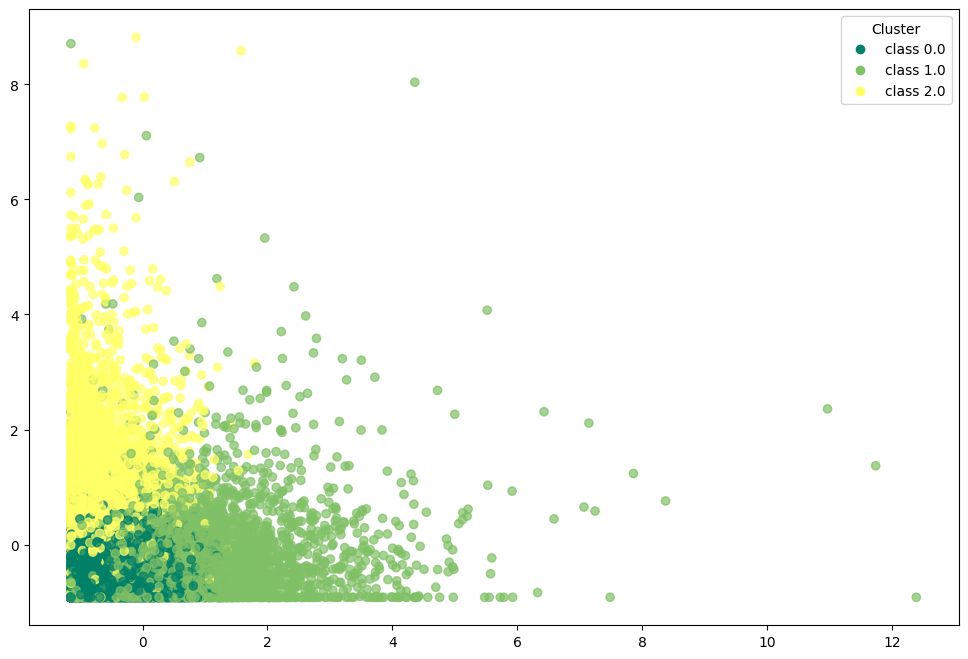

In [200]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pam_umap.iloc[:, 0],df_pam_umap.iloc[:, 1], 
                      c=df_pam_umap['pam_umap'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_umap['pam_umap'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [201]:
sil = silhouette_score(df_pam_umap.iloc[:,:-1], df_pam_umap['pam_umap'])
ch = calinski_harabasz_score(df_pam_umap.iloc[:,:-1], df_pam_umap['pam_umap'])
db = davies_bouldin_score(df_pam_umap.iloc[:,:-1], df_pam_umap['pam_umap'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.1604387052343193
Calinski-Harabasz: 2121.6403138073865
Davies-Bouldin: 1.8320697831264487


## spectral clustering

In [202]:
spectral_clustering = SpectralClustering(n_clusters=N_CLUSTER,affinity ='nearest_neighbors')

In [203]:
spectral_clustering.fit(energy_scaled)

SpectralClustering(affinity='nearest_neighbors', n_clusters=3)

In [204]:
df_spectral = energy_scaled.copy()

In [205]:
df_spectral['spectral_clustering'] = spectral_clustering.labels_

In [206]:
df_spectral

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0             0.701582         0.390188           0.282245   
1            -0.065298        -0.329103           0.269734   
2            -0.976789         0.364396          -0.563570   
3             0.859447         0.974712          -0.229911   
4            -0.423954         0.272112          -0.277771   
...                ...              ...                ...   
12314        -1.147049         0.377318          -0.840912   
12315        -0.987178        -0.869413          -1.122644   
12316         2.166460        -0.701802          -0.452877   
12317        -1.059172         0.656418          -0.927077   
12318        -0.230108         0.422701          -0.767226   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  \
0                  0.501495         2.777355            1.576855   
1                 -0.372616         0.418060            0.047695   
2                 -0.728603        -0.056174           -0.744960   
3                 -0.653975        -0.172136            0.179759   
4                  0.414273        -0.779727           -0.593009   
...                     ...              ...                 ...   
12314              0.309472        -0.434149           -0.191160   
12315             -1.275782        -0.918192           -1.001231   
12316             -0.969270        -0.768910           -0.927939   
12317              0.207987        -0.828081           -0.929896   
12318             -0.139171        -0.317265           -0.270857   

       spectral_clustering  
0                        0  
1                        0  
2                        1  
3                        0  
4                        1  
...                    ...  
12314                    2  
12315                    1  
12316                    0  
12317                    2  
12318                    1  

[12319 rows x 7 columns]

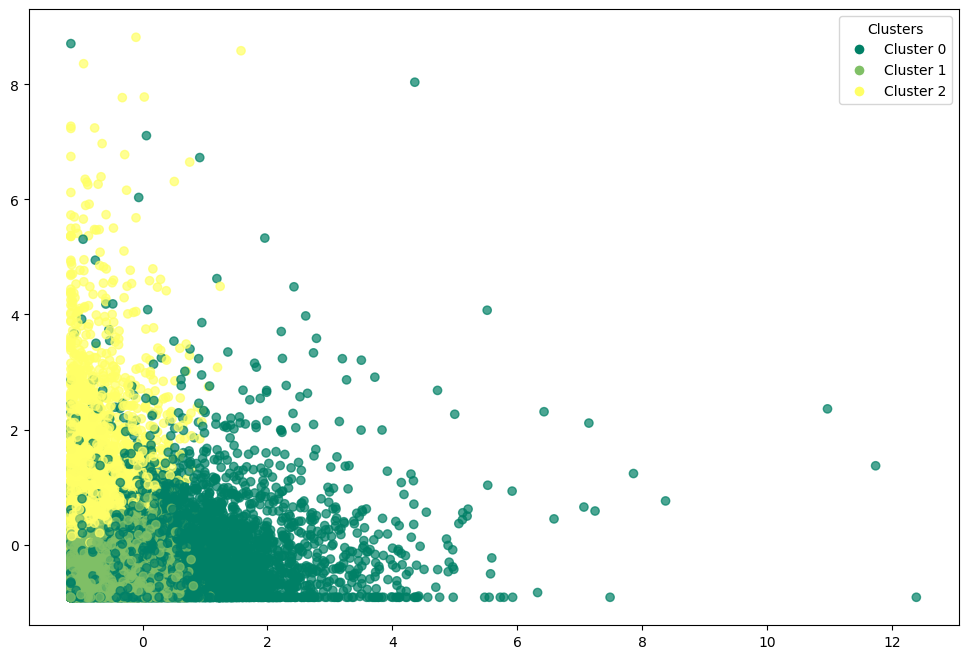

In [207]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_spectral.iloc[:, 0], df_spectral.iloc[:, 1], 
                      c=df_spectral['spectral_clustering'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_spectral['spectral_clustering'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [208]:
sil = silhouette_score(df_spectral.iloc[:,:-1], df_spectral['spectral_clustering'])
ch = calinski_harabasz_score(df_spectral.iloc[:,:-1], df_spectral['spectral_clustering'])
db = davies_bouldin_score(df_spectral.iloc[:,:-1], df_spectral['spectral_clustering'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.16904769933429534
Calinski-Harabasz: 2139.329409867163
Davies-Bouldin: 1.65775769254474


### spectral clustering with pca

In [209]:
spectral_pca = SpectralClustering(n_clusters=N_CLUSTER,affinity ='nearest_neighbors')

In [210]:
spectral_pca.fit(X_pca)

SpectralClustering(affinity='nearest_neighbors', n_clusters=3)

In [211]:
df_pca_spectral = energy_scaled.copy()

In [212]:
df_pca_spectral["spectral_pca"] = spectral_pca.labels_

In [213]:
df_pca_spectral

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0             0.701582         0.390188           0.282245   
1            -0.065298        -0.329103           0.269734   
2            -0.976789         0.364396          -0.563570   
3             0.859447         0.974712          -0.229911   
4            -0.423954         0.272112          -0.277771   
...                ...              ...                ...   
12314        -1.147049         0.377318          -0.840912   
12315        -0.987178        -0.869413          -1.122644   
12316         2.166460        -0.701802          -0.452877   
12317        -1.059172         0.656418          -0.927077   
12318        -0.230108         0.422701          -0.767226   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  spectral_pca  
0                  0.501495         2.777355            1.576855             1  
1                 -0.372616         0.418060            0.047695             0  
2                 -0.728603        -0.056174           -0.744960             2  
3                 -0.653975        -0.172136            0.179759             1  
4                  0.414273        -0.779727           -0.593009             2  
...                     ...              ...                 ...           ...  
12314              0.309472        -0.434149           -0.191160             2  
12315             -1.275782        -0.918192           -1.001231             2  
12316             -0.969270        -0.768910           -0.927939             0  
12317              0.207987        -0.828081           -0.929896             2  
12318             -0.139171        -0.317265           -0.270857             2  

[12319 rows x 7 columns]

### spectral clustering with t-SNE

In [214]:
spectral_tsne = SpectralClustering(n_clusters=N_CLUSTER,affinity ='nearest_neighbors')

In [215]:
spectral_tsne.fit(X_tsne)

SpectralClustering(affinity='nearest_neighbors', n_clusters=3)

In [216]:
df_tsne_spectral = energy_scaled.copy()

In [217]:
df_tsne_spectral['spectral_tsne'] = spectral_tsne.labels_

In [218]:
df_tsne_spectral

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0             0.701582         0.390188           0.282245   
1            -0.065298        -0.329103           0.269734   
2            -0.976789         0.364396          -0.563570   
3             0.859447         0.974712          -0.229911   
4            -0.423954         0.272112          -0.277771   
...                ...              ...                ...   
12314        -1.147049         0.377318          -0.840912   
12315        -0.987178        -0.869413          -1.122644   
12316         2.166460        -0.701802          -0.452877   
12317        -1.059172         0.656418          -0.927077   
12318        -0.230108         0.422701          -0.767226   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  \
0                  0.501495         2.777355            1.576855   
1                 -0.372616         0.418060            0.047695   
2                 -0.728603        -0.056174           -0.744960   
3                 -0.653975        -0.172136            0.179759   
4                  0.414273        -0.779727           -0.593009   
...                     ...              ...                 ...   
12314              0.309472        -0.434149           -0.191160   
12315             -1.275782        -0.918192           -1.001231   
12316             -0.969270        -0.768910           -0.927939   
12317              0.207987        -0.828081           -0.929896   
12318             -0.139171        -0.317265           -0.270857   

       spectral_tsne  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
12314              0  
12315              0  
12316              0  
12317              0  
12318              0  

[12319 rows x 7 columns]

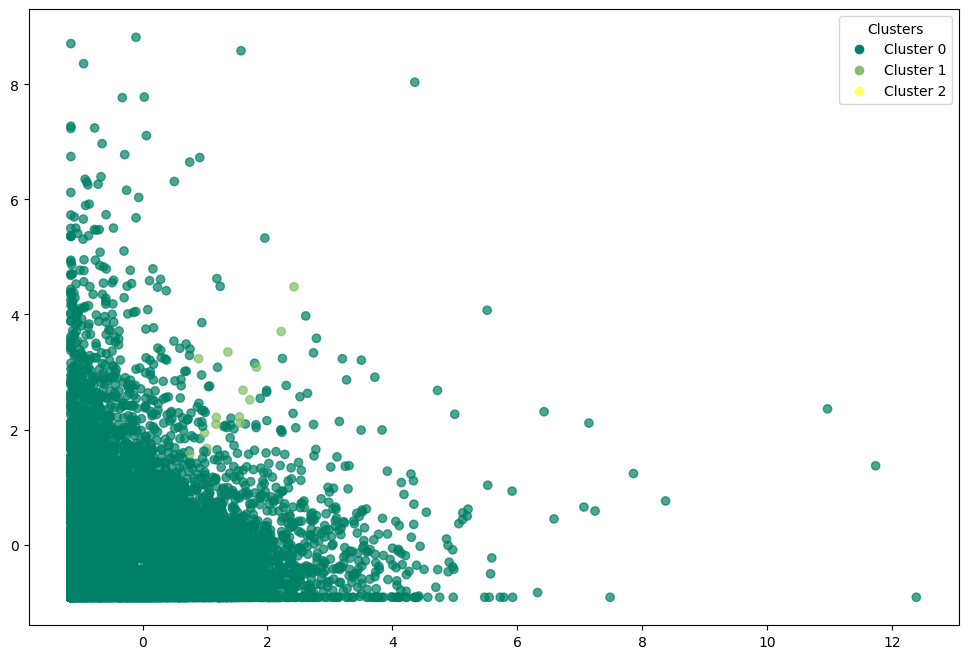

In [219]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_tsne_spectral.iloc[:, 0], df_tsne_spectral.iloc[:, 1], 
                      c=df_tsne_spectral['spectral_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_spectral['spectral_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [220]:
sil = silhouette_score(df_tsne_spectral.iloc[:,:-1], df_tsne_spectral['spectral_tsne'])
ch = calinski_harabasz_score(df_tsne_spectral.iloc[:,:-1], df_tsne_spectral['spectral_tsne'])
db = davies_bouldin_score(df_tsne_spectral.iloc[:,:-1], df_tsne_spectral['spectral_tsne'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: -0.3241515553795172
Calinski-Harabasz: 17.849379104392746
Davies-Bouldin: 1.6269525105479892


### spectral clustering with umap

In [221]:
spectral_umap = SpectralClustering(n_clusters=N_CLUSTER,affinity ='nearest_neighbors')

In [222]:
spectral_umap.fit(X_umap)

SpectralClustering(affinity='nearest_neighbors', n_clusters=3)

In [223]:
df_umap_spectral = energy_scaled.copy()

In [224]:
df_umap_spectral['spectral_umap'] = spectral_umap.labels_

In [225]:
df_umap_spectral

Tot_heating_EUI  Tot_cooling_EUI  Tot_waterheat_EUI  \
0             0.701582         0.390188           0.282245   
1            -0.065298        -0.329103           0.269734   
2            -0.976789         0.364396          -0.563570   
3             0.859447         0.974712          -0.229911   
4            -0.423954         0.272112          -0.277771   
...                ...              ...                ...   
12314        -1.147049         0.377318          -0.840912   
12315        -0.987178        -0.869413          -1.122644   
12316         2.166460        -0.701802          -0.452877   
12317        -1.059172         0.656418          -0.927077   
12318        -0.230108         0.422701          -0.767226   

       Tot_refrigeretor_EUI  Tot_cooking_EUI  Tot_appliances_EUI  \
0                  0.501495         2.777355            1.576855   
1                 -0.372616         0.418060            0.047695   
2                 -0.728603        -0.056174           -0.744960   
3                 -0.653975        -0.172136            0.179759   
4                  0.414273        -0.779727           -0.593009   
...                     ...              ...                 ...   
12314              0.309472        -0.434149           -0.191160   
12315             -1.275782        -0.918192           -1.001231   
12316             -0.969270        -0.768910           -0.927939   
12317              0.207987        -0.828081           -0.929896   
12318             -0.139171        -0.317265           -0.270857   

       spectral_umap  
0                  1  
1                  1  
2                  0  
3                  0  
4                  0  
...              ...  
12314              0  
12315              2  
12316              1  
12317              0  
12318              2  

[12319 rows x 7 columns]

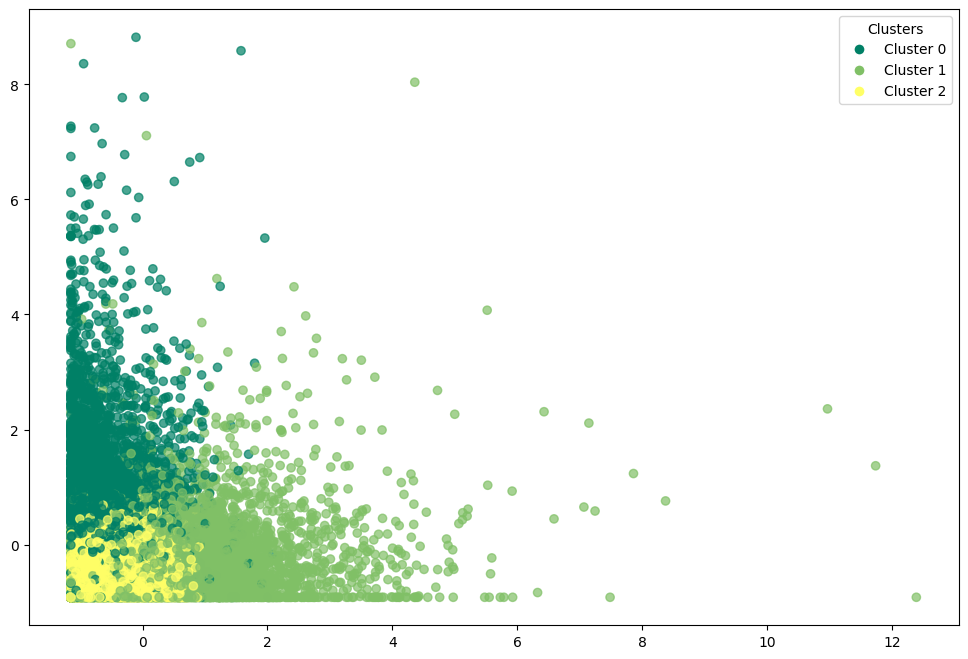

In [226]:
plt.figure(figsize=(12,8)) 
scatter = plt.scatter(df_umap_spectral.iloc[:, 0], df_umap_spectral.iloc[:, 1], 
                      c=df_umap_spectral['spectral_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_spectral['spectral_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [227]:
sil = silhouette_score(df_umap_spectral.iloc[:,:-1], df_umap_spectral['spectral_umap'])
ch = calinski_harabasz_score(df_umap_spectral.iloc[:,:-1], df_umap_spectral['spectral_umap'])
db = davies_bouldin_score(df_umap_spectral.iloc[:,:-1], df_umap_spectral['spectral_umap'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.15802508490625736
Calinski-Harabasz: 2072.853142360626
Davies-Bouldin: 1.8580160805185308


# internal measures

In [228]:
results = {}

def evaluate_clustering(X, y_pred):

    scores = {
        "Silhouette": silhouette_score(X, y_pred),
        "Davies Bouldin": davies_bouldin_score(X, y_pred),
        "Calinski Harabasz": calinski_harabasz_score(X, y_pred),
        
    }
    return scores

def evaluate_and_store(name, X, y_pred):
    scores = evaluate_clustering(X, y_pred)
    results[name] = scores

# k-means
evaluate_and_store("k-means",df_kmeans.drop(['k_means'],axis=1).values,df_kmeans['k_means'])

evaluate_and_store("k-means + pca",df_pca_kmeans.drop(['kmeans_pca'],axis=1).values,df_pca_kmeans['kmeans_pca'])

evaluate_and_store("k-means + tsne",df_tsne_kmeans.drop(['kmeans_tsne'],axis=1).values,df_tsne_kmeans['kmeans_tsne'])

evaluate_and_store("k-means + umap",df_umap_kmeans.drop(['kmeans_umap'],axis=1).values,df_umap_kmeans['kmeans_umap'])

# Birch
evaluate_and_store("Birch",df_birch.drop(['birch'],axis=1).values,df_birch['birch'])

evaluate_and_store("Birch + pca",df_pca_birch.drop(['birch_pca'],axis=1).values,df_pca_birch['birch_pca'])

evaluate_and_store("Birch + tsne",df_tsne_birch.drop(['birch_tsne'],axis=1).values,df_tsne_birch['birch_tsne'])

evaluate_and_store("Birch + umap",df_umap_birch.drop(['birch_umap'],axis=1).values,df_umap_birch['birch_umap'])

# GMM
evaluate_and_store("GMM",df_gmm.drop(['gmm'],axis=1).values,df_gmm['gmm'])

evaluate_and_store("GMM + pca",df_pca_gmm.drop(['gmm_pca'],axis=1).values,df_pca_gmm['gmm_pca'])

evaluate_and_store("GMM + tsne",df_tsne_gmm.drop(['gmm_tsne'],axis=1).values,df_tsne_gmm['gmm_tsne'])

evaluate_and_store("GMM + umap",df_umap_gmm.drop(['gmm_umap'],axis=1).values,df_umap_gmm['gmm_umap'])

# PAM
evaluate_and_store("PAM",df_pam.drop(['pam'],axis=1).values,df_pam['pam'])

evaluate_and_store("PAM + pca",df_pam_pca.drop(['pam_pca'],axis=1).values,df_pam_pca['pam_pca'])

evaluate_and_store("PAM + tsne",df_pam_tsne.drop(['pam_tsne'],axis=1).values,df_pam_tsne['pam_tsne'])

evaluate_and_store("PAM + umap",df_pam_umap.drop(['pam_umap'],axis=1).values,df_pam_umap['pam_umap'])

# Spectral clustering
evaluate_and_store("Spectral Clustering",df_spectral.drop(['spectral_clustering'],axis=1).values,df_spectral['spectral_clustering'])

evaluate_and_store("Spectral Clustering + pca",df_pca_spectral.drop(['spectral_pca'],axis=1).values,df_pca_spectral['spectral_pca'])

evaluate_and_store("Spectral Clustering + tsne",df_tsne_spectral.drop(['spectral_tsne'],axis=1).values,df_tsne_spectral['spectral_tsne'])

evaluate_and_store("Spectral Clustering + umap",df_umap_spectral.drop(['spectral_umap'],axis=1).values,df_umap_spectral['spectral_umap'])


df_results = pd.DataFrame(results).T  
df_results = df_results.round(3)    

print(df_results)

                            Silhouette  Davies Bouldin  Calinski Harabasz
k-means                          0.277           1.542           2992.346
k-means + pca                    0.248           1.658           2959.847
k-means + tsne                   0.132           1.914           1913.705
k-means + umap                   0.163           1.849           2121.008
Birch                            0.597           0.988            606.532
Birch + pca                      0.766           0.972            258.940
Birch + tsne                     0.034           1.957           1443.787
Birch + umap                     0.071           1.769           1658.505
GMM                              0.156           2.050           2360.226
GMM + pca                        0.160           1.969           2552.775
GMM + tsne                       0.120           2.135           1805.816
GMM + umap                       0.066           1.917           1721.289
PAM                              0.244